## **Análise Exploratória - Application Crédito - Pod Bank**

#### **Importar bibliotecas**

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append(r'/home/jean/projetos/pod-bank/global/')
from util import *

import warnings

# Ignorar todos os warnings
warnings.filterwarnings("ignore")

In [45]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Importar dados

In [46]:
application_00 = pd.read_csv('../data/raw/application_train.csv')
application_00.shape

(215257, 172)

In [47]:
application_00.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      247330       0         Cash loans           F            N   
1      425716       1         Cash loans           F            Y   
2      331625       0         Cash loans           M            Y   
3      455397       0    Revolving loans           F            N   
4      449114       0         Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               N             0          157500.0    706410.0      67072.5   
1               Y             1          121500.0    545040.0      25407.0   
2               Y             1          225000.0    942300.0      27679.5   
3               Y             2          144000.0    180000.0       9000.0   
4               Y             0          112500.0    729792.0      37390.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0         679500.0   Unaccompanied  Commercial associate   
1         450000.0   Unaccompanied               Working   
2         675000.0   Unaccompanied               Working   
3         180000.0   Unaccompanied  Commercial associate   
4         630000.0   Unaccompanied             Pensioner   

             NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
0               Higher education            Married    House / apartment   
1  Secondary / secondary special            Married    House / apartment   
2  Secondary / secondary special            Married  Municipal apartment   
3  Secondary / secondary special          Separated    House / apartment   
4  Secondary / secondary special     Civil marriage    House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.032561      -14653          -2062            -8599.0   
1                    0.007114      -13995          -2246             -348.0   
2                    0.022625      -21687          -1335            -6306.0   
3                    0.006629      -13071          -2292             -742.0   
4                    0.046220      -19666         365243             -169.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2087          NaN           1               1                0   
1             -172         12.0           1               1                1   
2            -4026          1.0           1               1                0   
3            -1201          NaN           1               1                1   
4            -3112          NaN           1               0                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL        OCCUPATION_TYPE  \
0                 1           1           0  Private service staff   
1                 1           1           0            Secretaries   
2                 1           0           0               Laborers   
3                 1           1           0          Cooking staff   
4                 1           0           0                    NaN   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              2.0                     1                            1   
1              3.0                     2                            2   
2              3.0                     2                            2   
3              3.0                     2                            2   
4              2.0                     1                            1   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       13   
1                     MONDAY                       10   
2                   THURSDAY                       10   
3                     MONDAY                        8   
4                     FRIDAY                       10   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                   

In [5]:
for col in application_00.columns:
  if 'var_' in col:
    application_00 = application_00.drop(labels=col, axis='columns')

application_00.shape

(215257, 122)

### Metadados

In [6]:
metadados = generate_metadata(df=application_00, targets=['TARGET', 'SK_ID_CURR'], orderby='PC_NULOS')
metadados

FEATURE  USO_FEATURE  QT_NULOS  PC_NULOS  \
0                  COMMONAREA_AVG  Explicativa    150377     69.86   
1                 COMMONAREA_MODE  Explicativa    150377     69.86   
2                 COMMONAREA_MEDI  Explicativa    150377     69.86   
3        NONLIVINGAPARTMENTS_MEDI  Explicativa    149407     69.41   
4        NONLIVINGAPARTMENTS_MODE  Explicativa    149407     69.41   
5         NONLIVINGAPARTMENTS_AVG  Explicativa    149407     69.41   
6              FONDKAPREMONT_MODE  Explicativa    147183     68.38   
7            LIVINGAPARTMENTS_AVG  Explicativa    147079     68.33   
8           LIVINGAPARTMENTS_MEDI  Explicativa    147079     68.33   
9           LIVINGAPARTMENTS_MODE  Explicativa    147079     68.33   
10                 FLOORSMIN_MODE  Explicativa    145996     67.82   
11                  FLOORSMIN_AVG  Explicativa    145996     67.82   
12                 FLOORSMIN_MEDI  Explicativa    145996     67.82   
13                YEARS_BUILD_AVG  Explicativa    143139     66.50   
14               YEARS_BUILD_MODE  Explicativa    143139     66.50   
15               YEARS_BUILD_MEDI  Explicativa    143139     66.50   
16                    OWN_CAR_AGE  Explicativa    141836     65.89   
17                  LANDAREA_MEDI  Explicativa    127807     59.37   
18                   LANDAREA_AVG  Explicativa    127807     59.37   
19                  LANDAREA_MODE  Explicativa    127807     59.37   
20              BASEMENTAREA_MODE  Explicativa    125984     58.53   
21              BASEMENTAREA_MEDI  Explicativa    125984     58.53   
22               BASEMENTAREA_AVG  Explicativa    125984     58.53   
23                   EXT_SOURCE_1  Explicativa    121249     56.33   
24             NONLIVINGAREA_MODE  Explicativa    118888     55.23   
25              NONLIVINGAREA_AVG  Explicativa    118888     55.23   
26             NONLIVINGAREA_MEDI  Explicativa    118888     55.23   
27                  ELEVATORS_AVG  Explicativa    114721     53.29   
28                 ELEVATORS_MEDI  Explicativa    114721     53.29   
29                 ELEVATORS_MODE  Explicativa    114721     53.29   
30             WALLSMATERIAL_MODE  Explicativa    109480     50.86   
31                 APARTMENTS_AVG  Explicativa    109300     50.78   
32                APARTMENTS_MEDI  Explicativa    109300     50.78   
33                APARTMENTS_MODE  Explicativa    109300     50.78   
34                 ENTRANCES_MODE  Explicativa    108418     50.37   
35                 ENTRANCES_MEDI  Explicativa    108418     50.37   
36                  ENTRANCES_AVG  Explicativa    108418     50.37   
37                 LIVINGAREA_AVG  Explicativa    108084     50.21   
38                LIVINGAREA_MEDI  Explicativa    108084     50.21   
39                LIVINGAREA_MODE  Explicativa    108084     50.21   
40                 HOUSETYPE_MODE  Explicativa    108041     50.19   
41                 FLOORSMAX_MODE  Explicativa    107182     49.79   
42                  FLOORSMAX_AVG  Explicativa    107182     49.79   
43                 FLOORSMAX_MEDI  Explicativa    107182     49.79   
44   YEARS_BEGINEXPLUATATION_MODE  Explicativa    104989     48.77   
45   YEARS_BEGINEXPLUATATION_MEDI  Explicativa    104989     48.77   
46    YEARS_BEGINEXPLUATATION_AVG  Explicativa    104989     48.77   
47                 TOTALAREA_MODE  Explicativa    103905     48.27   
48            EMERGENCYSTATE_MODE  Explicativa    102057     47.41   
49                OCCUPATION_TYPE  Explicativa     67409     31.32   
50                   EXT_SOURCE_3  Explicativa     42837     19.90   
51     AMT_REQ_CREDIT_BUREAU_HOUR  Explicativa     29150     13.54   
52     AMT_REQ_CREDIT_BUREAU_WEEK  Explicativa     29150     13.54   
53      AMT_REQ_CREDIT_BUREAU_MON  Explicativa     29150     13.54   
54     AMT_REQ_CREDIT_BUREAU_YEAR  Explicativa     29150     13.54   
55      AMT_REQ_CREDIT_BUREAU_DAY  Explicativa     29150     13.54   
56      AMT_REQ_CREDIT_BUREAU_QRT  E

## Entendimento do target

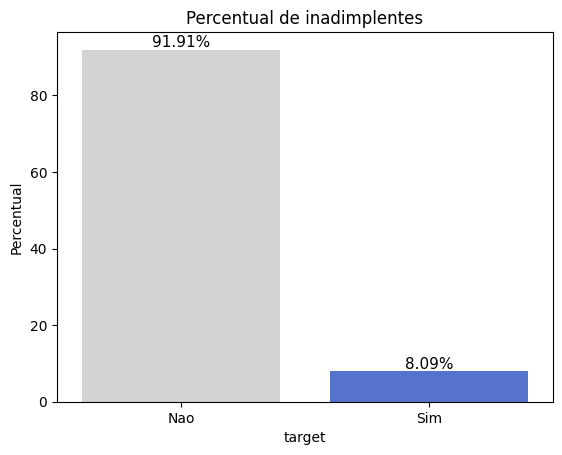

In [7]:
### Entendimento da variável resposta
target_counts = application_00['TARGET'].value_counts()

# Calculando percentuais de churn
percent_n = (target_counts[0] / len(application_00)) * 100
percent_s = (target_counts[1] / len(application_00)) * 100

# Criando dataframe
total_por_target = pd.DataFrame({'target': ['Nao', 'Sim'], 'Percentual': [percent_n, percent_s]})

#Definição de cores
cores = {'Nao': 'lightgrey', 'Sim': 'royalblue'}

# Plot do gráfico
ax = sns.barplot(x='target', y='Percentual', hue='target', data=total_por_target, palette=cores, dodge=False)

# Adicionando valores de cada barra
for p in ax.patches:
    ax.annotate("{:.2f}%".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('target')
plt.ylabel('Percentual')
plt.title('Percentual de inadimplentes')
plt.show()

### Análises univariadas e bivariadas

🔹 Análise Univariada - Variáveis Categóricas


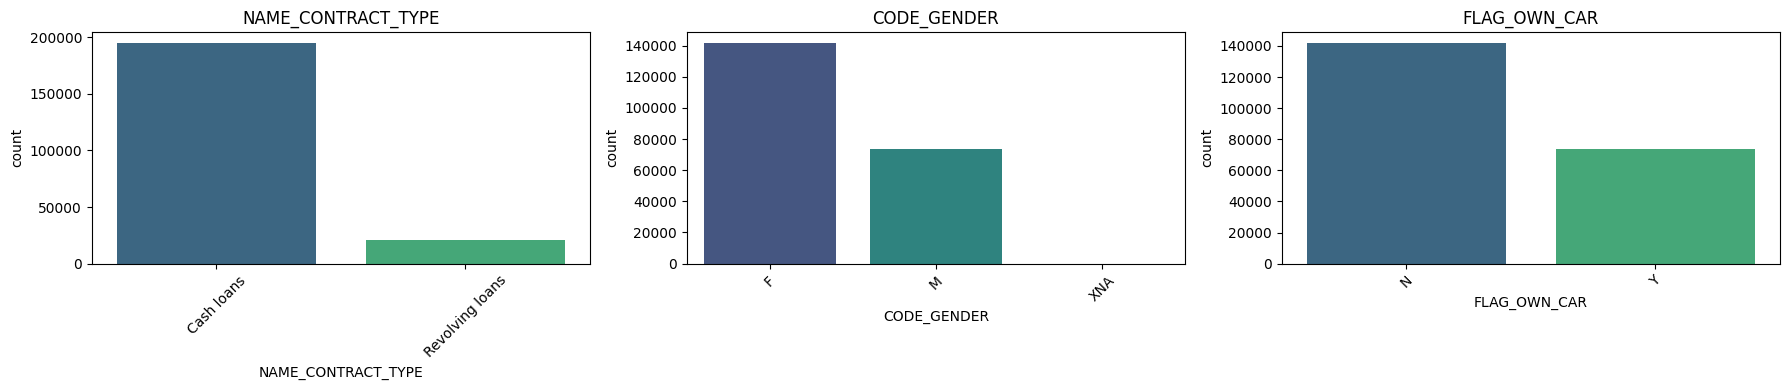

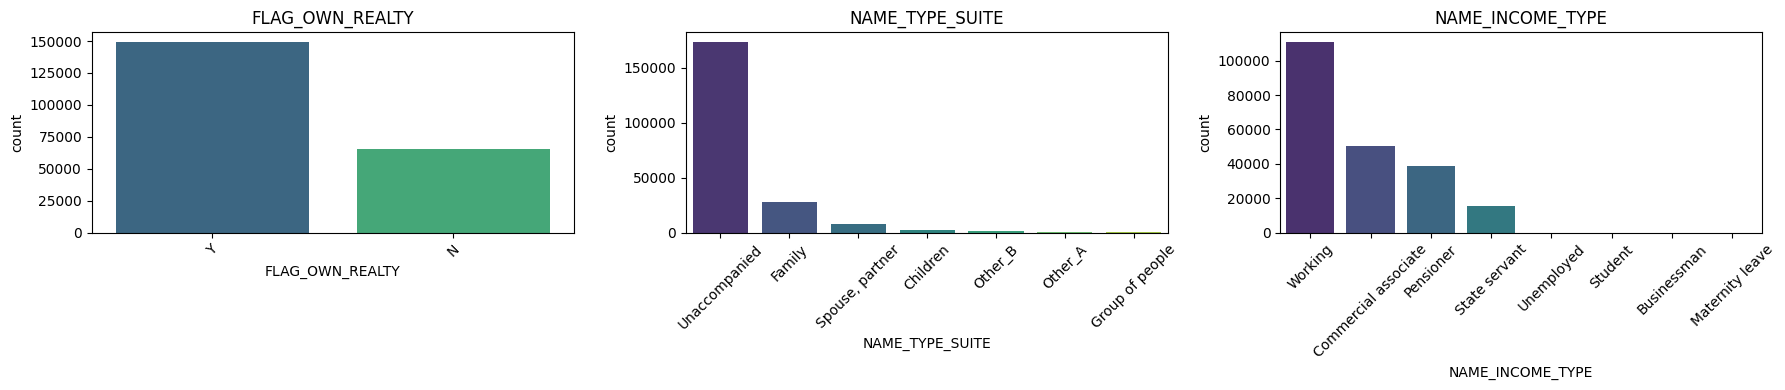

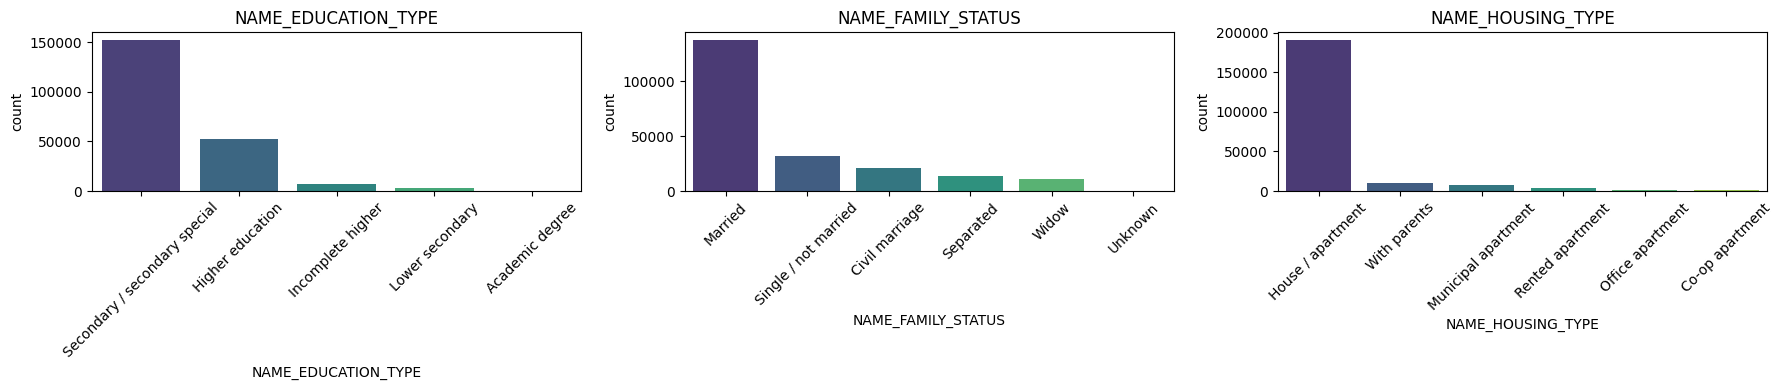

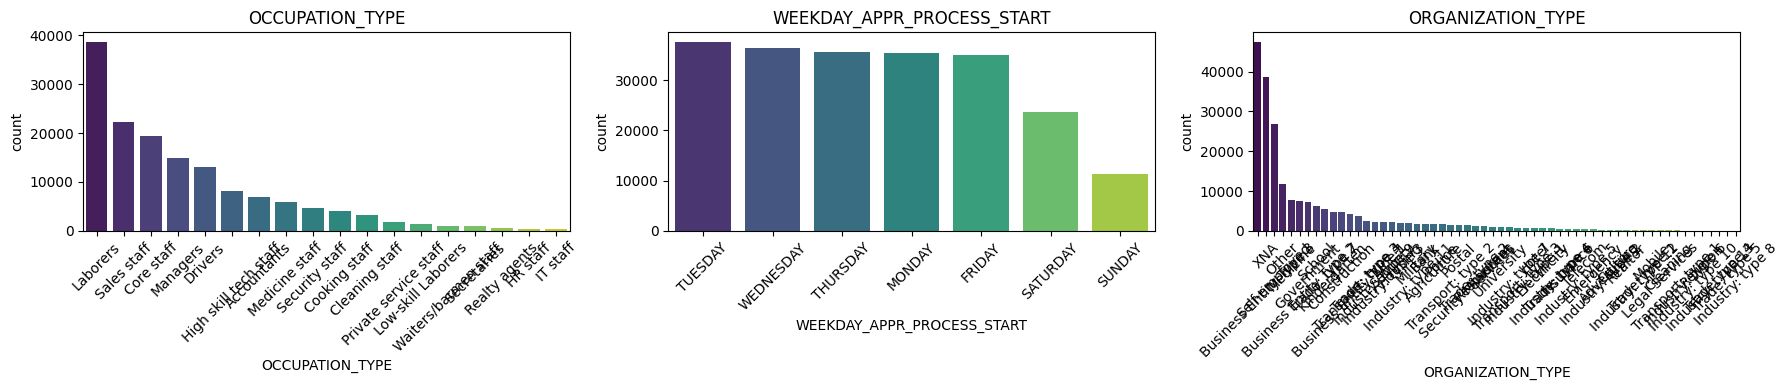

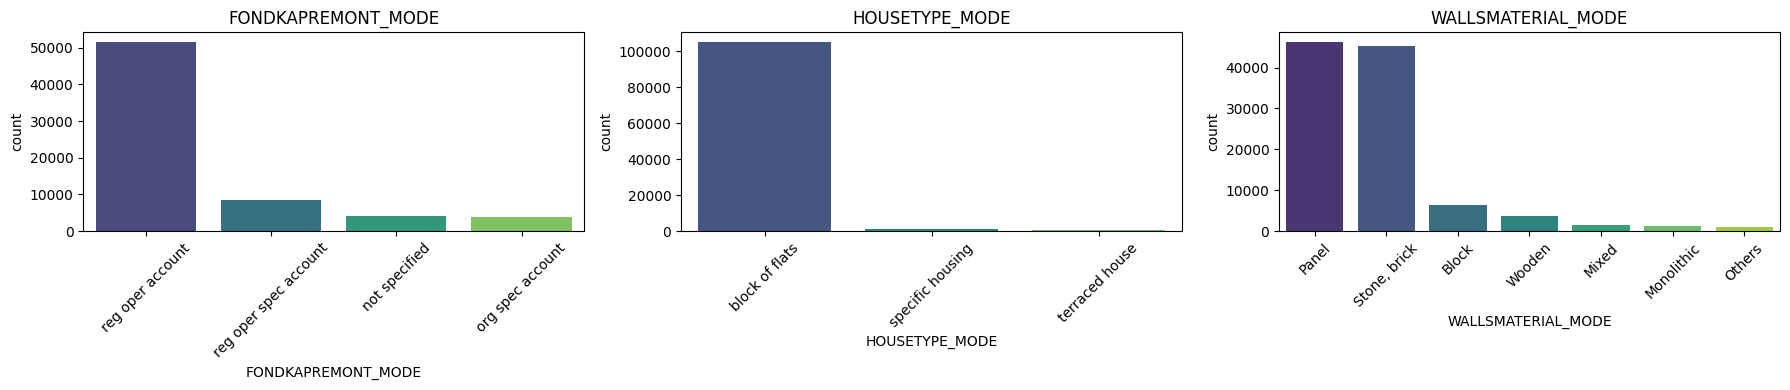

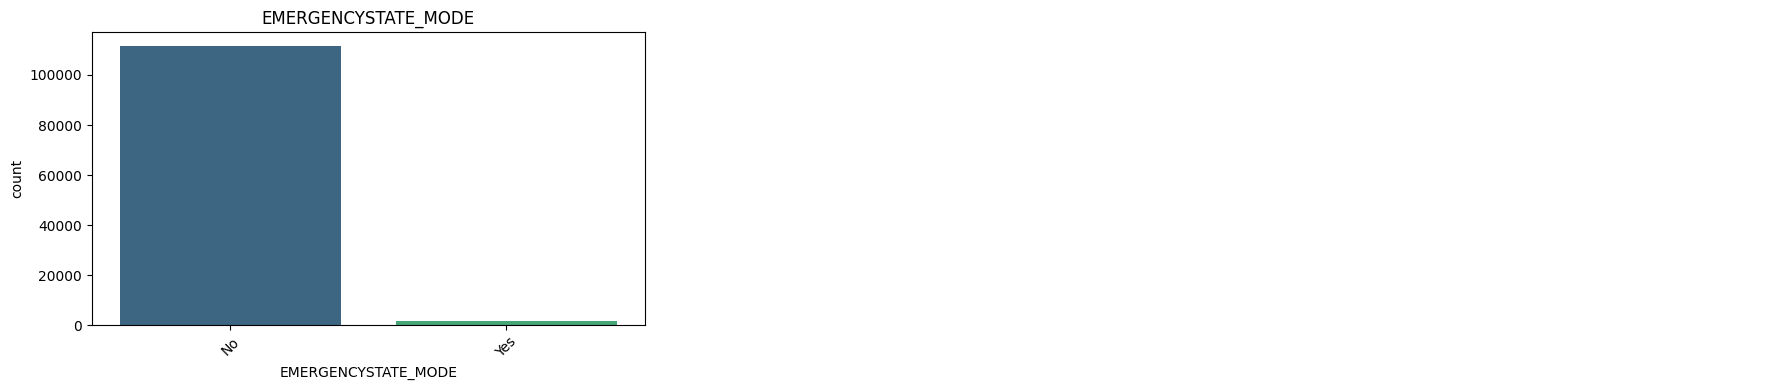

🔹 Análise Univariada - Variáveis Numéricas


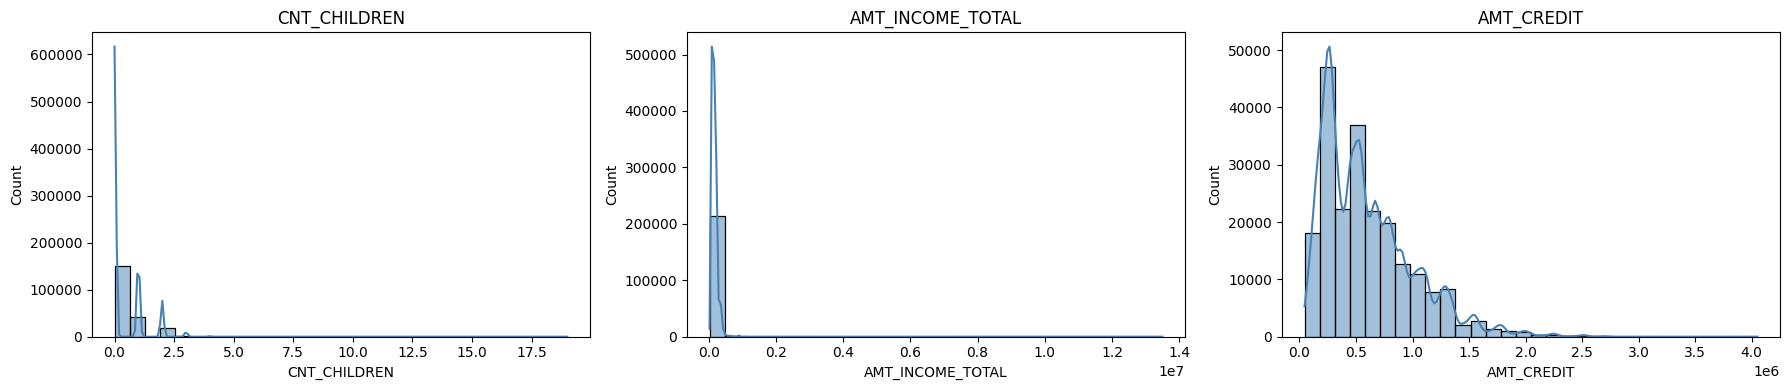

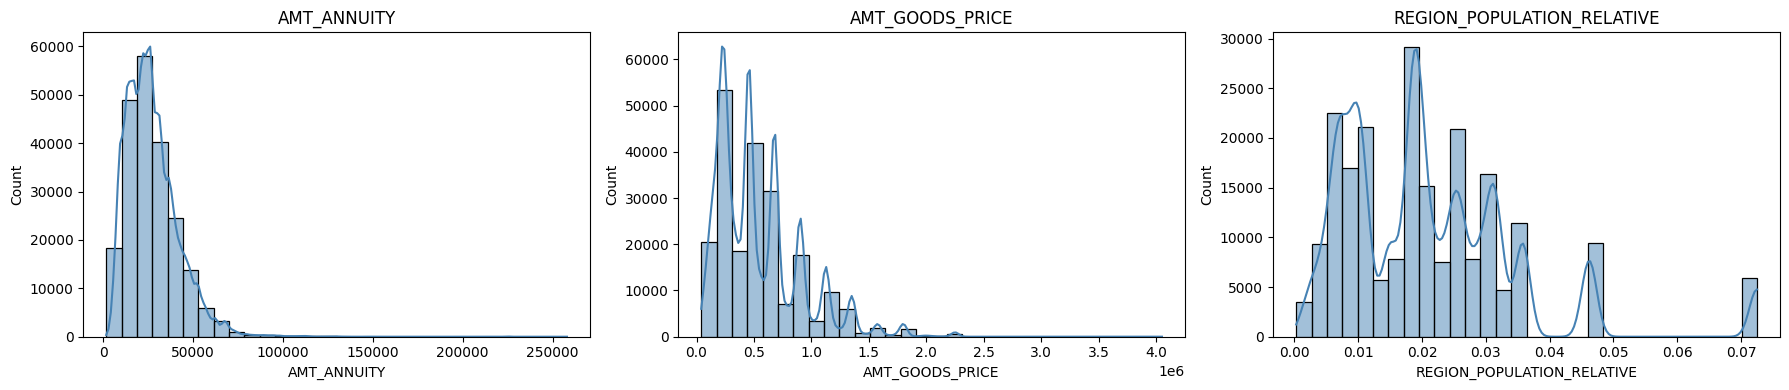

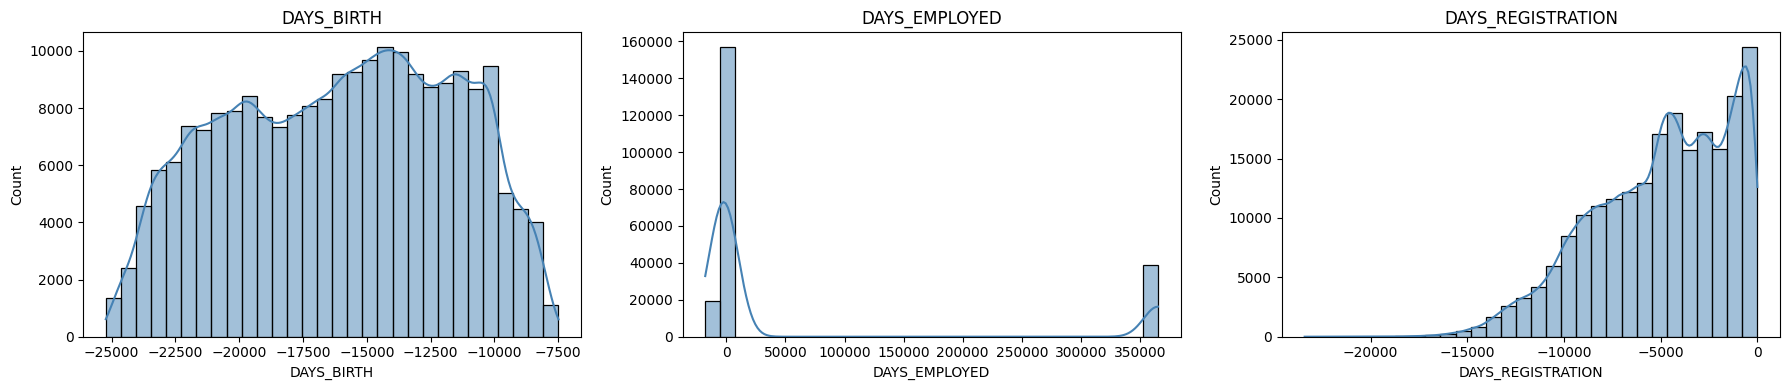

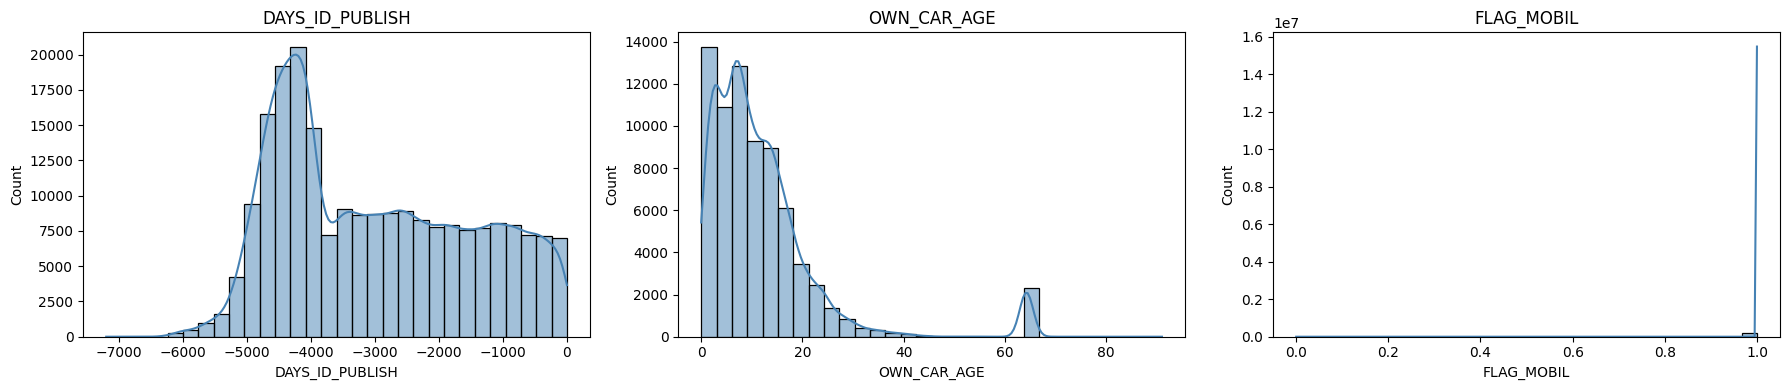

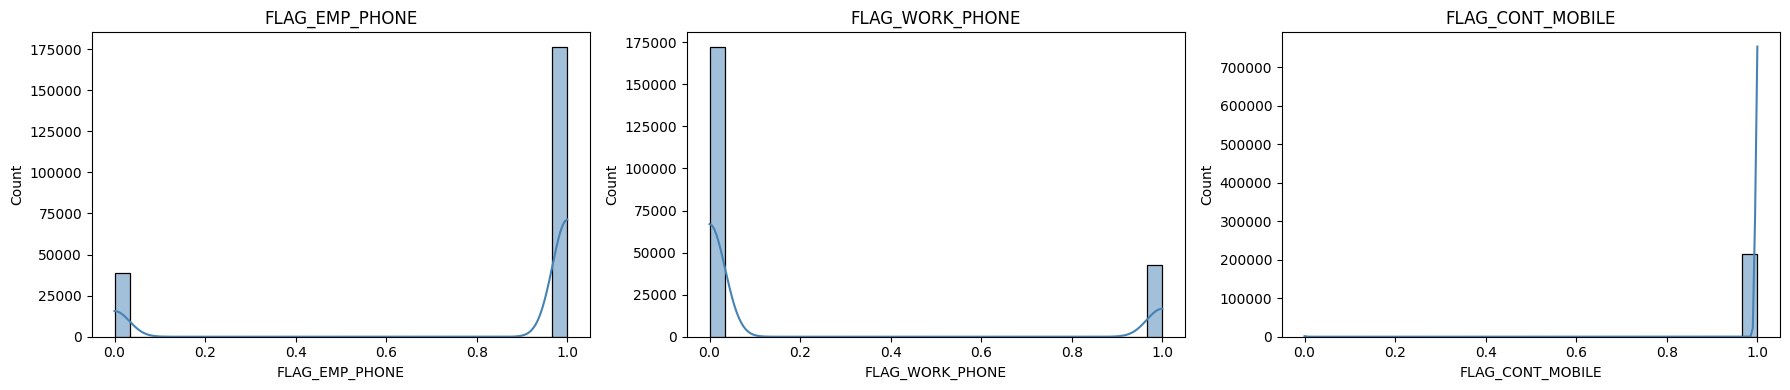

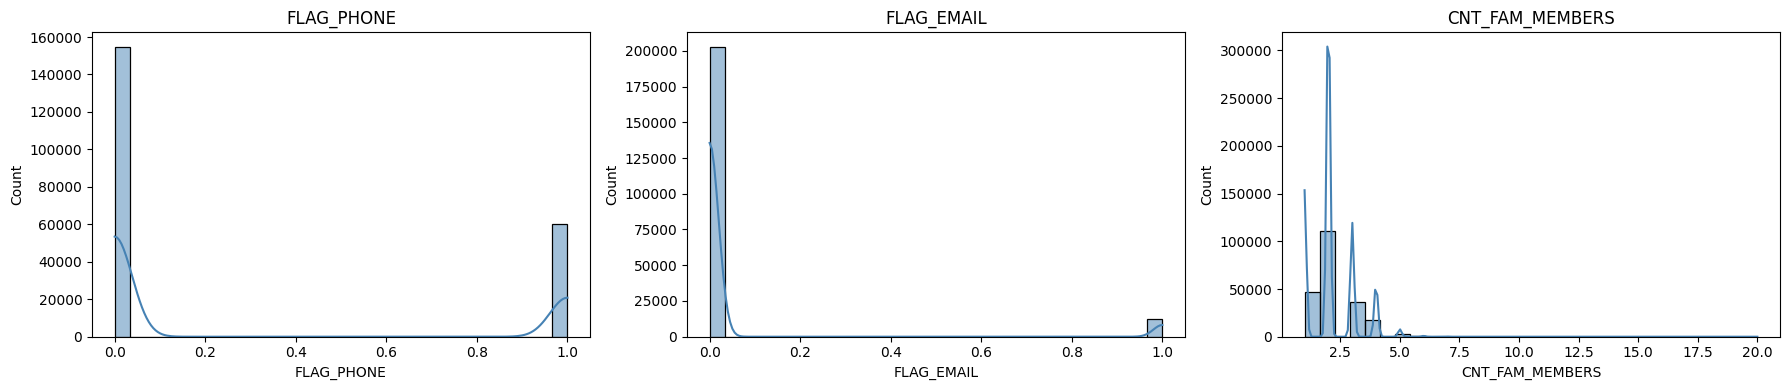

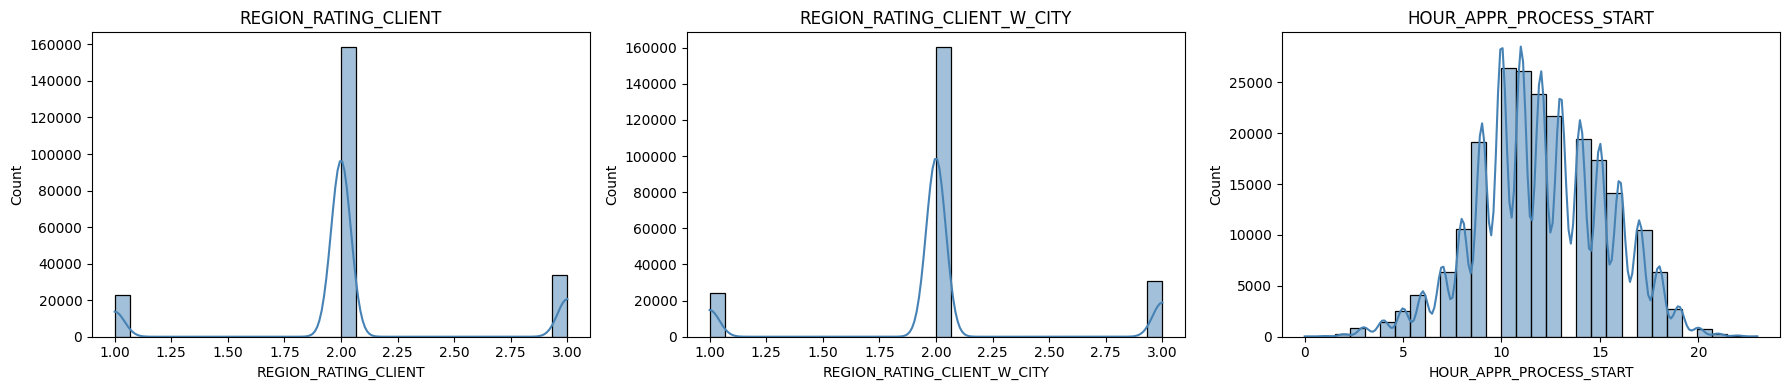

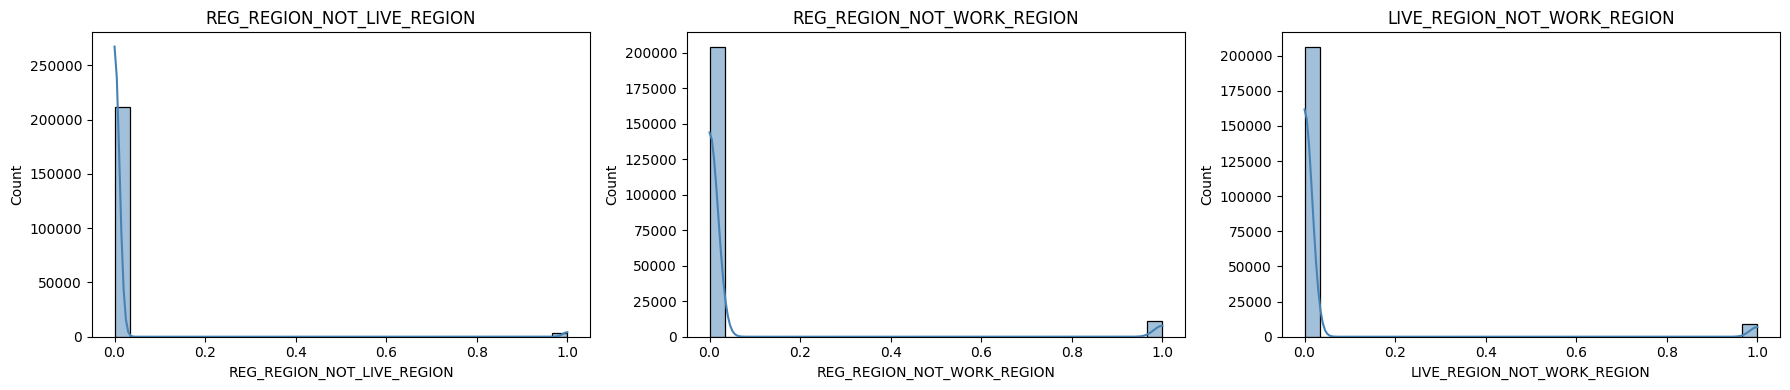

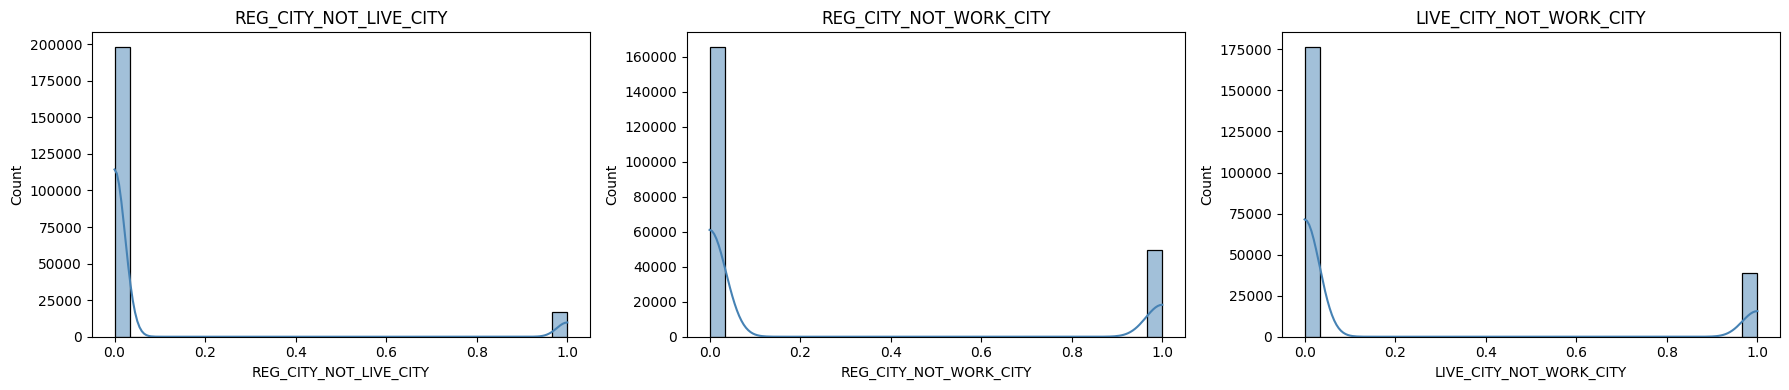

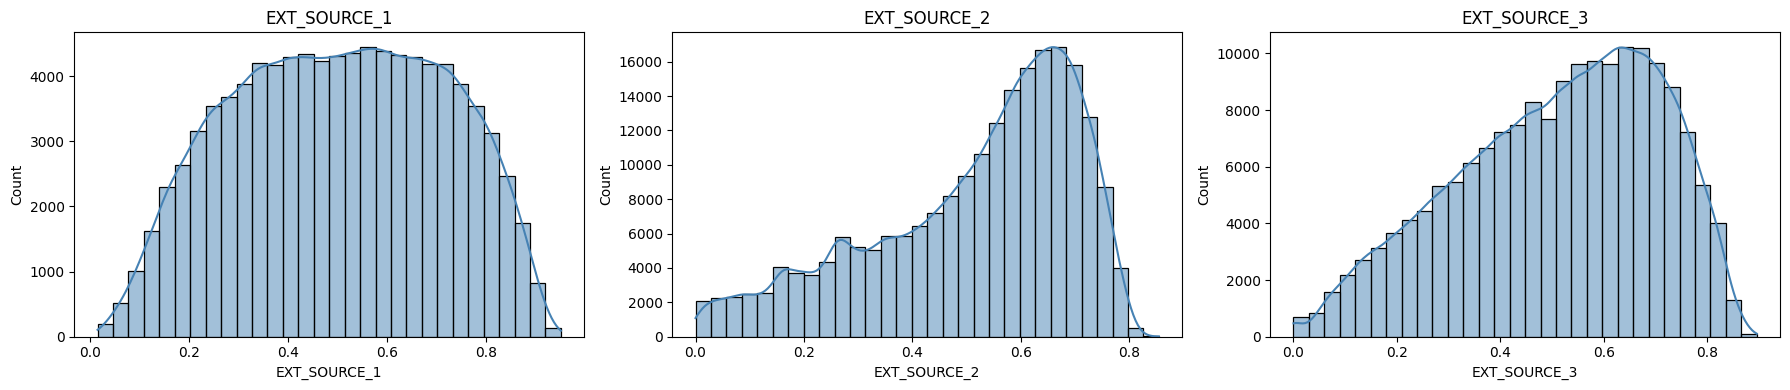

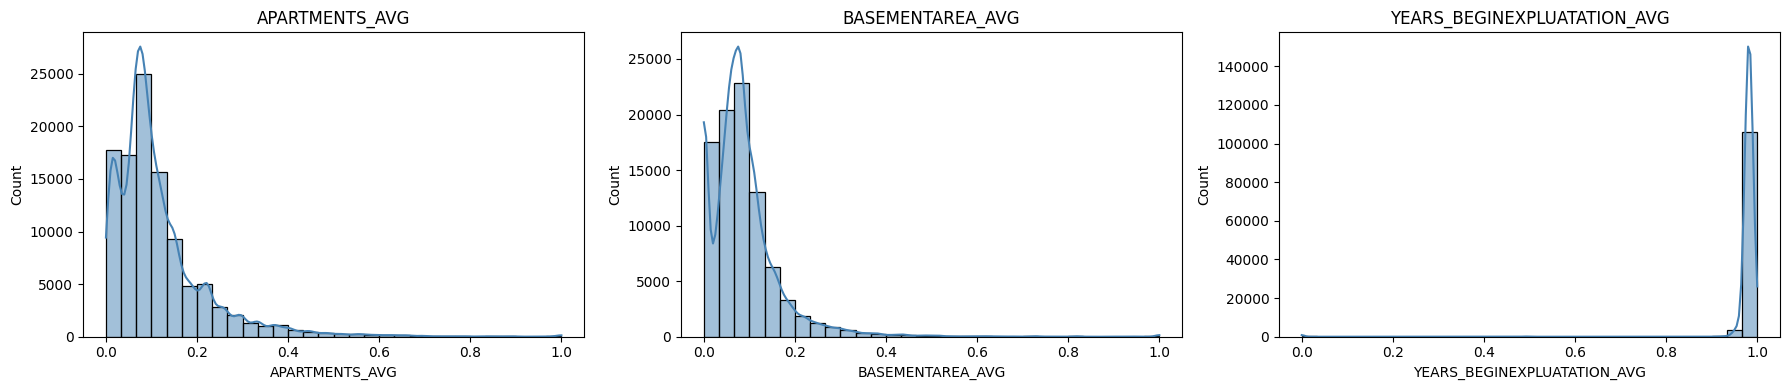

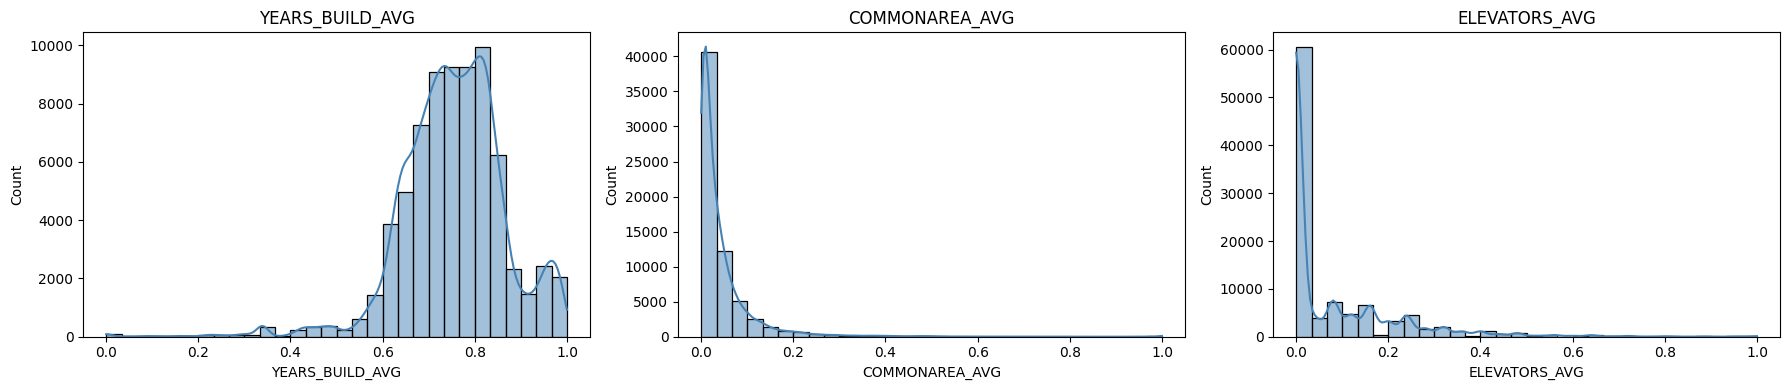

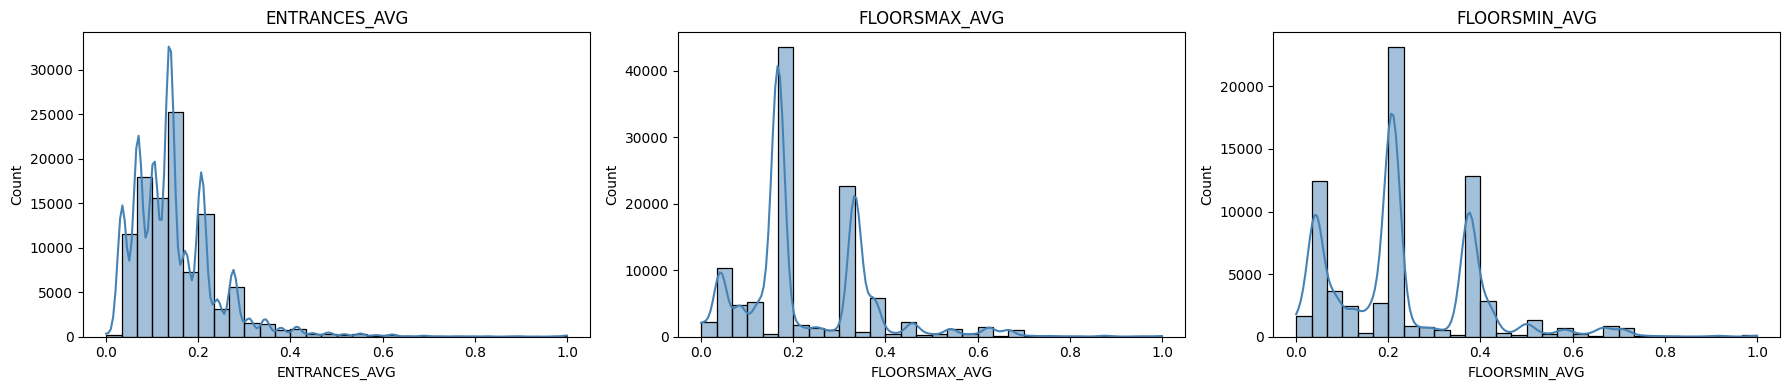

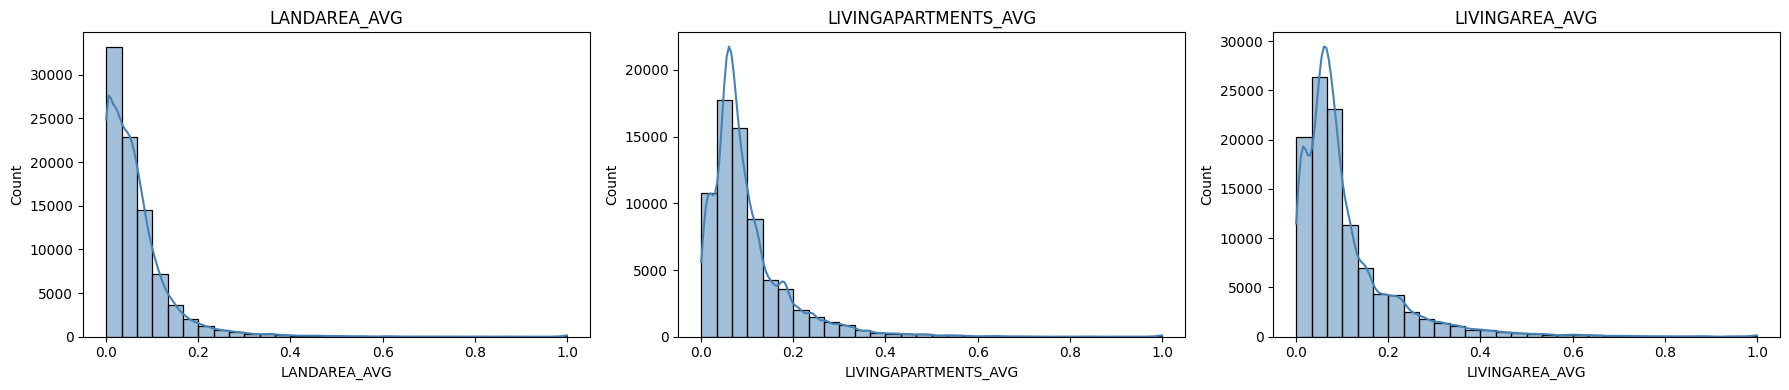

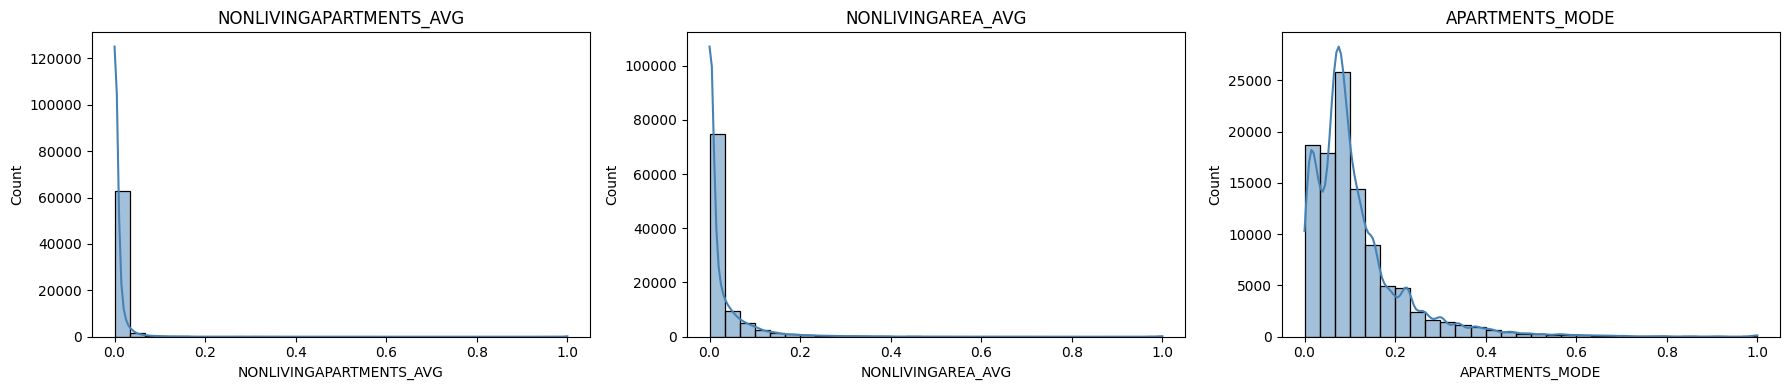

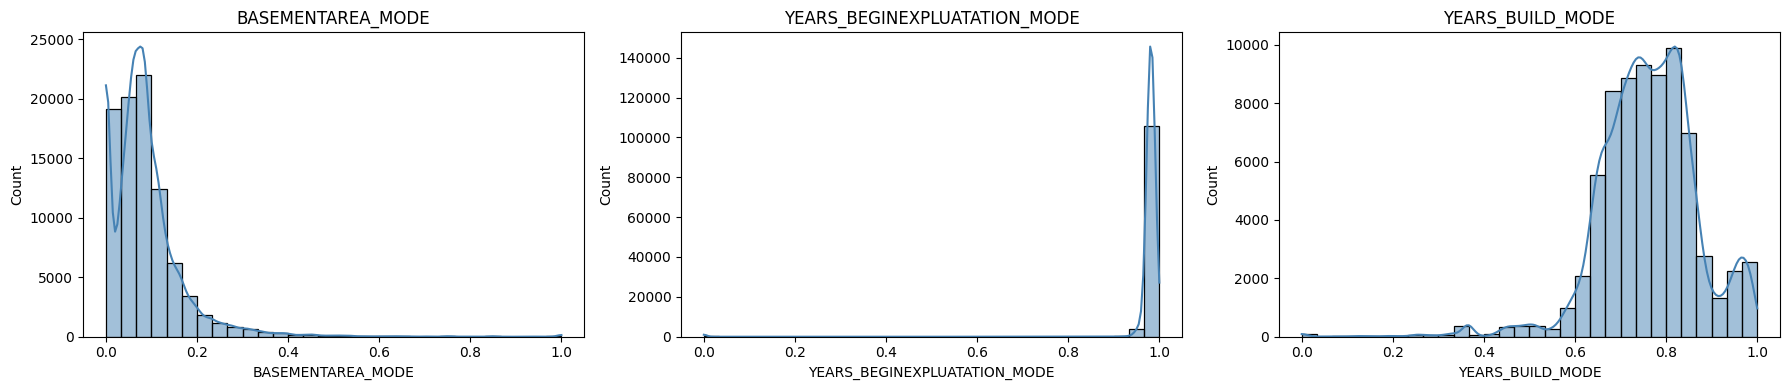

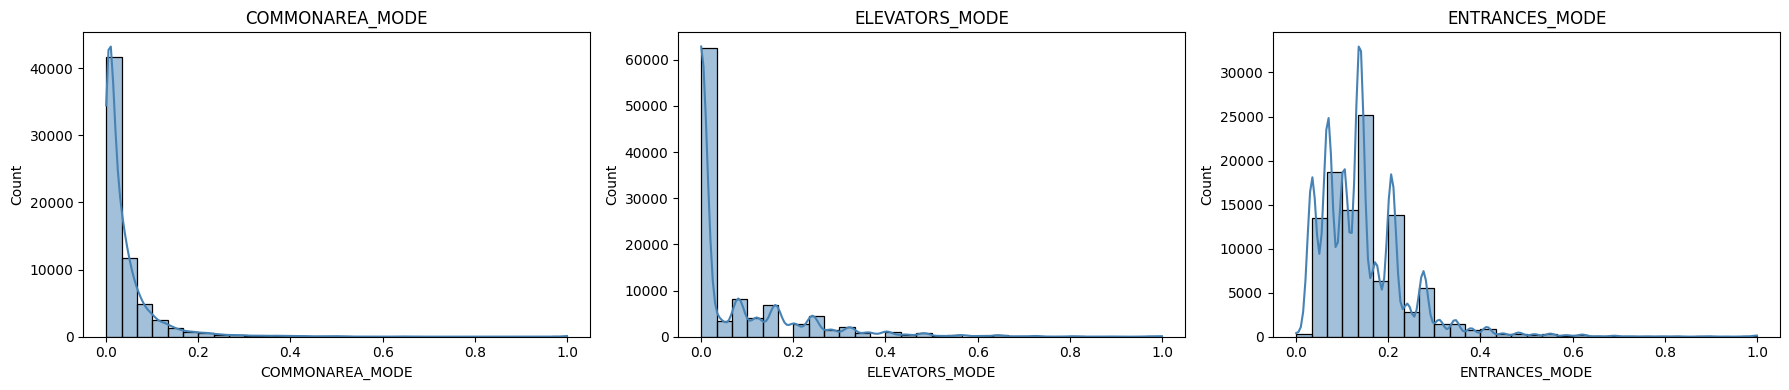

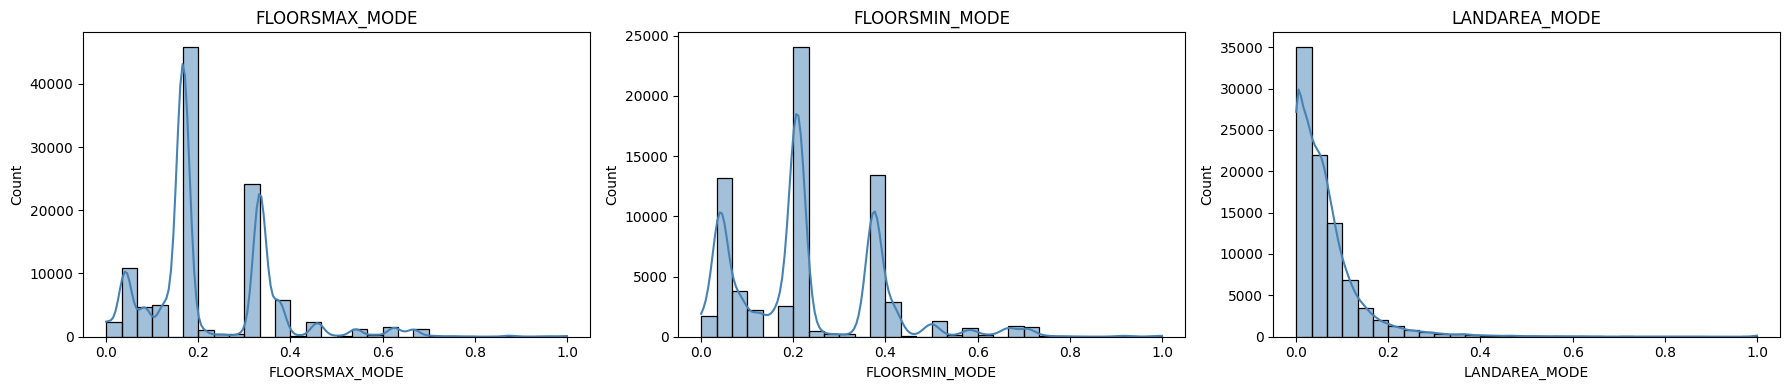

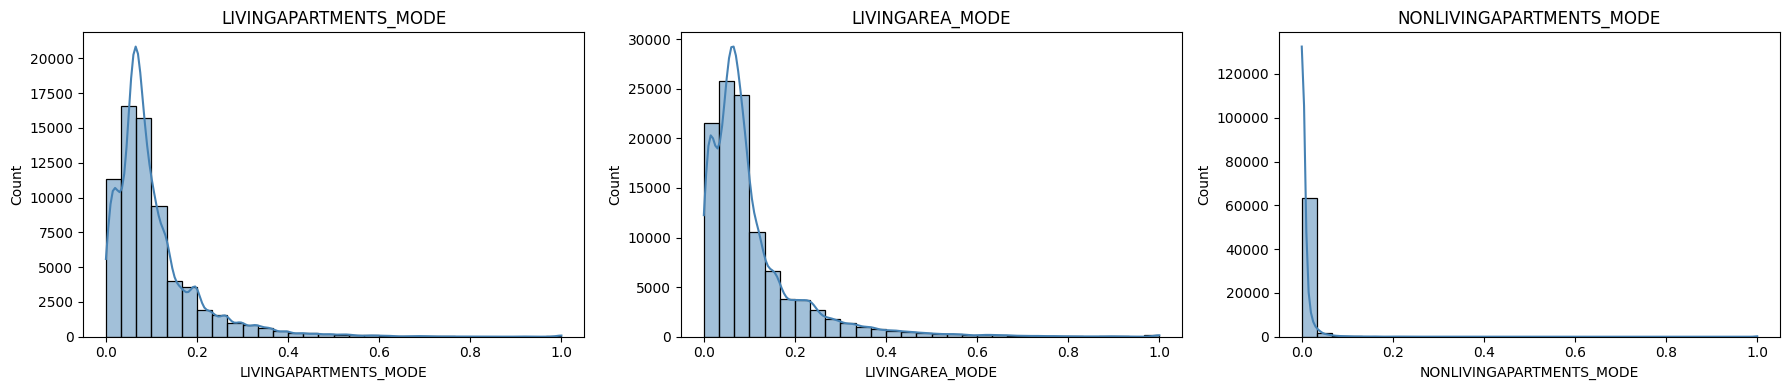

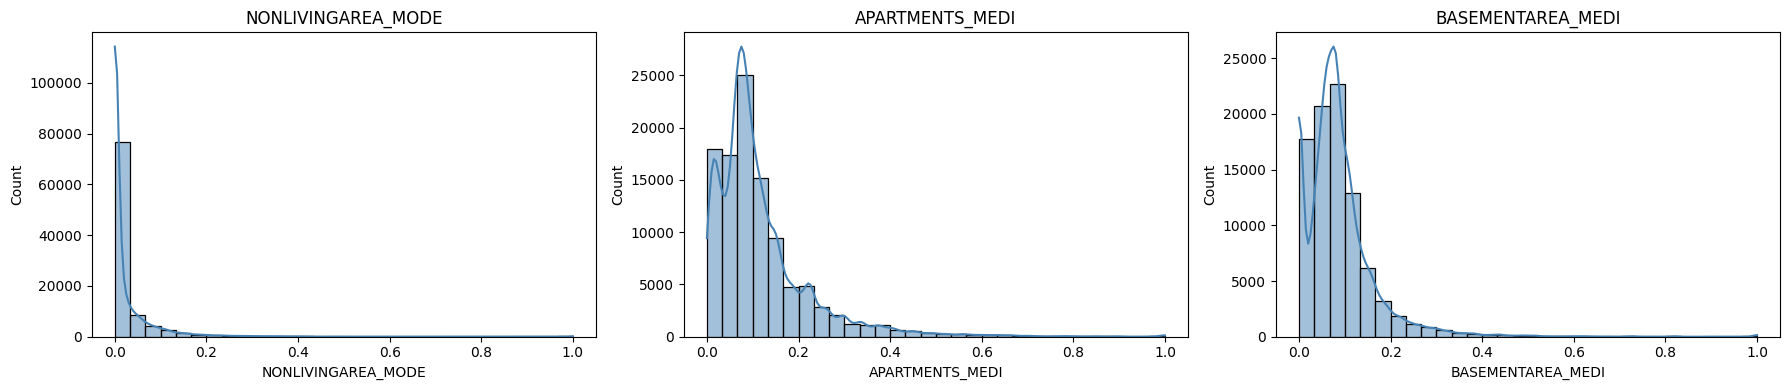

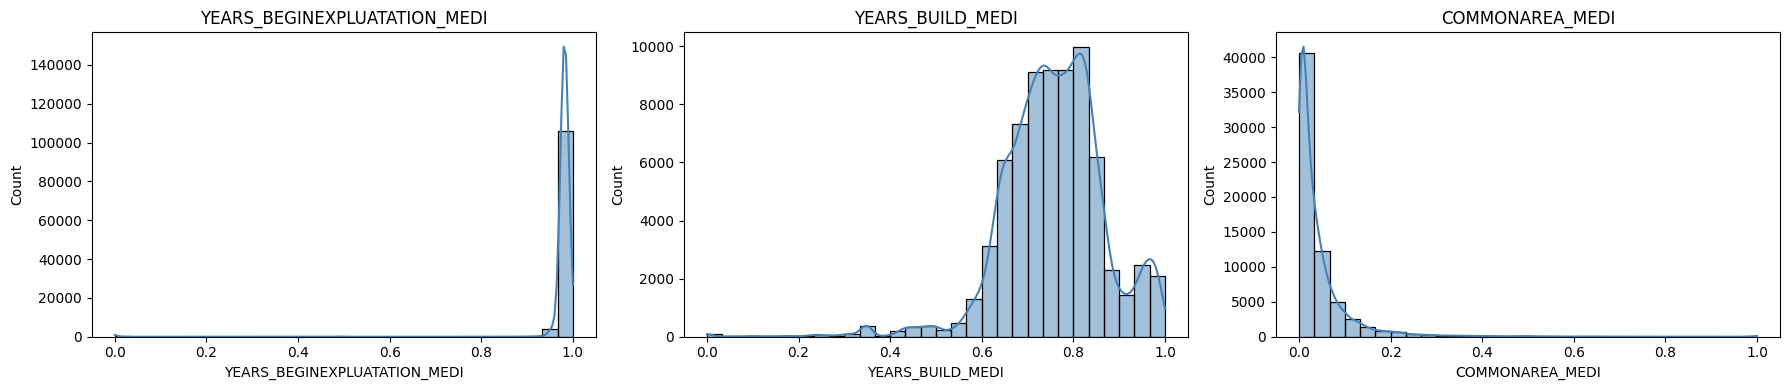

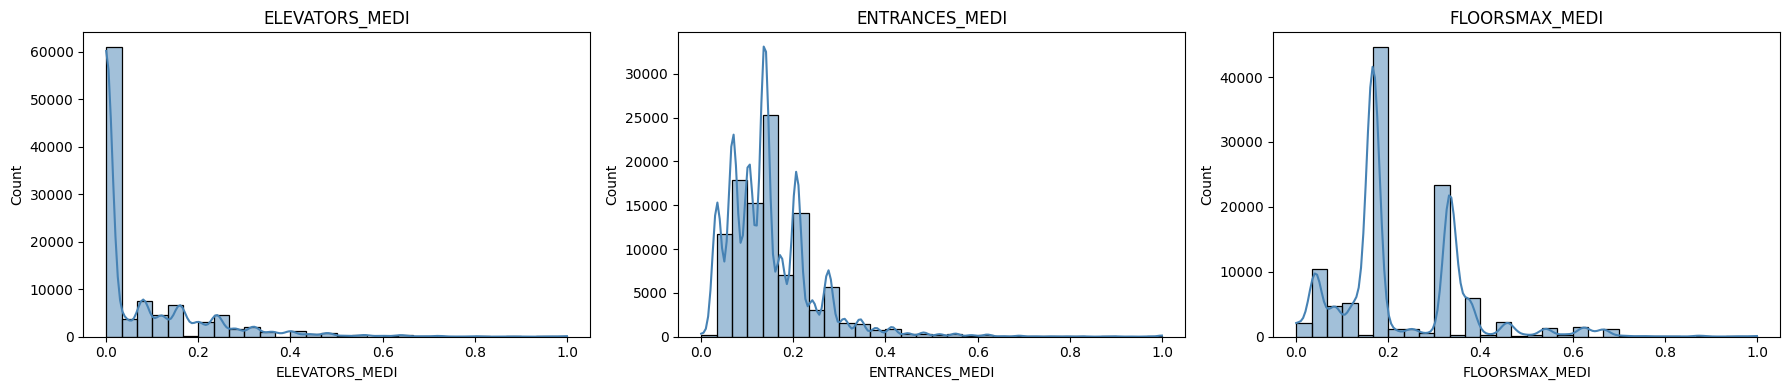

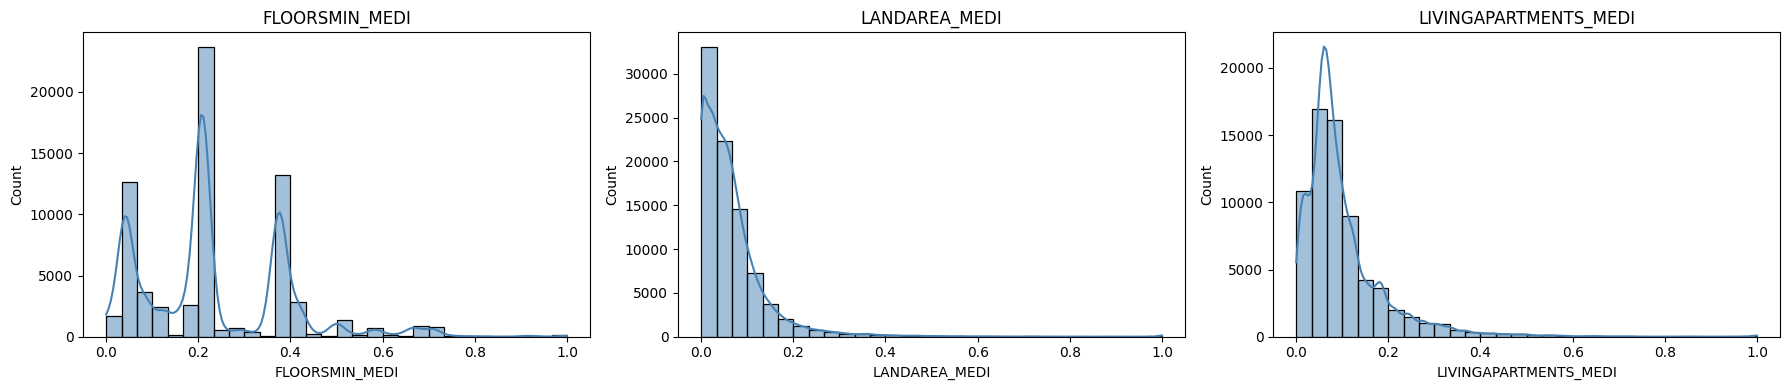

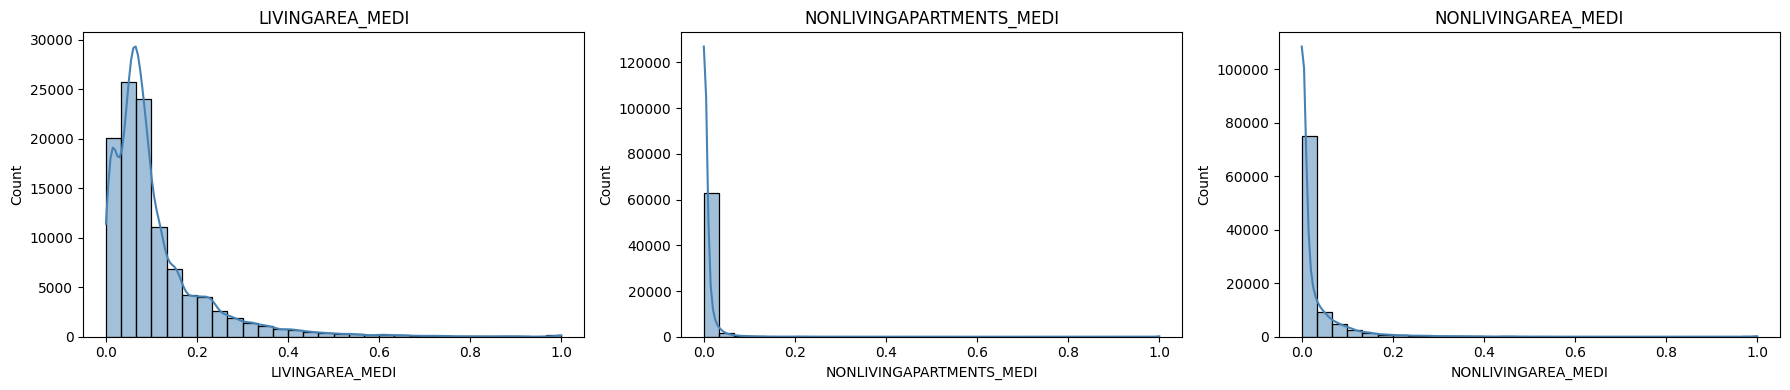

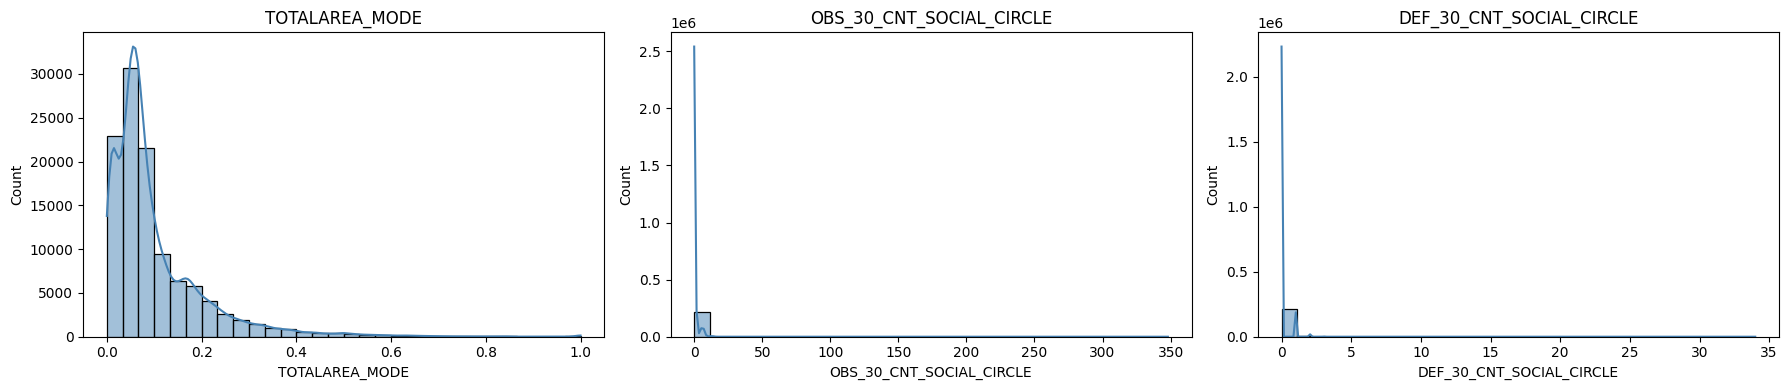

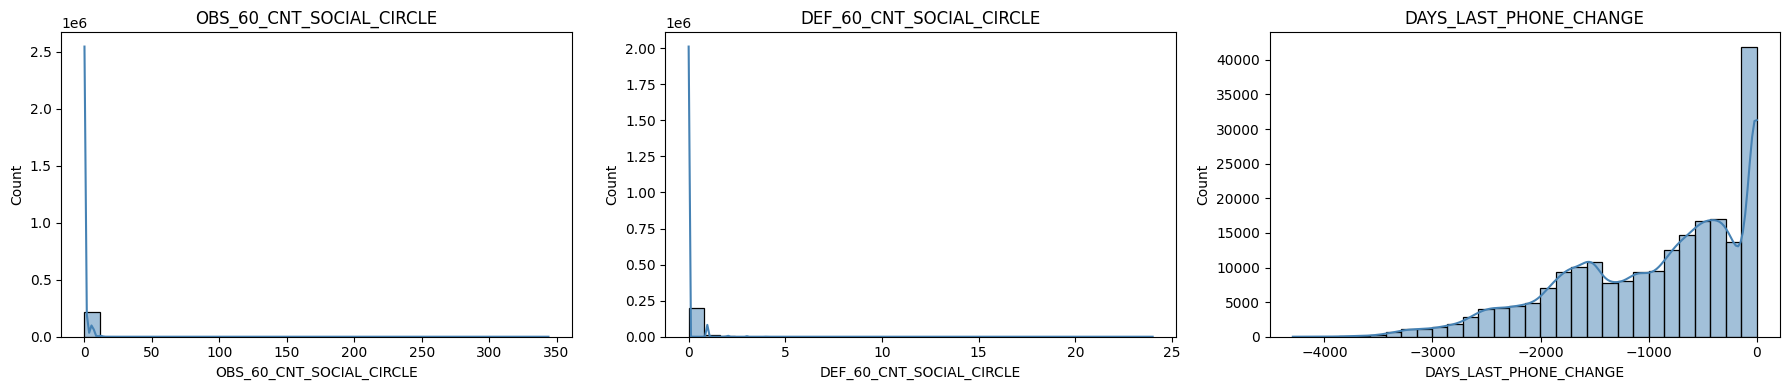

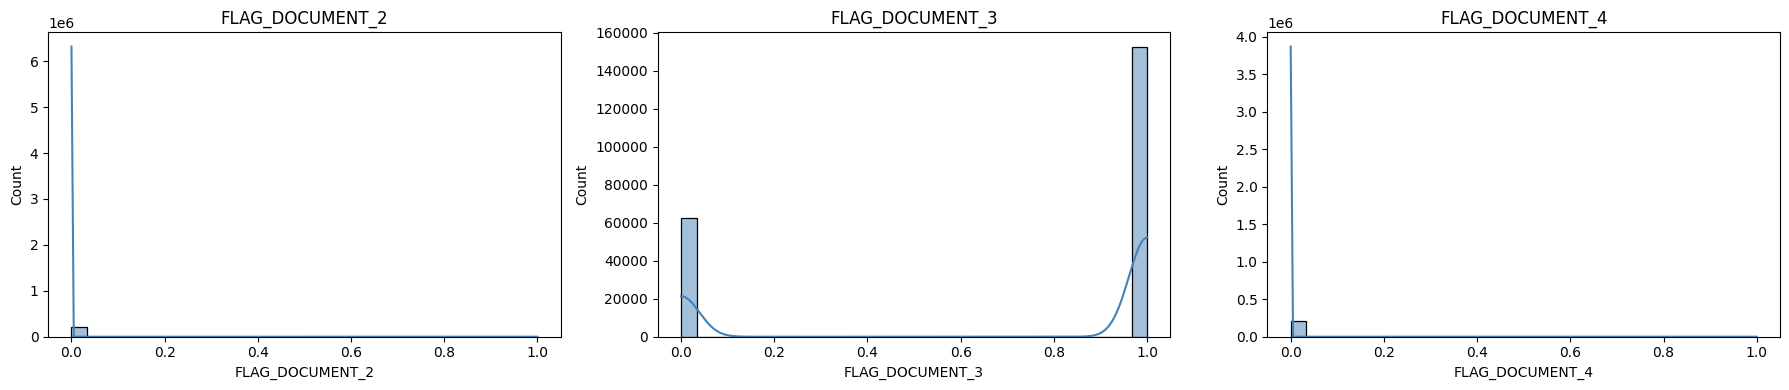

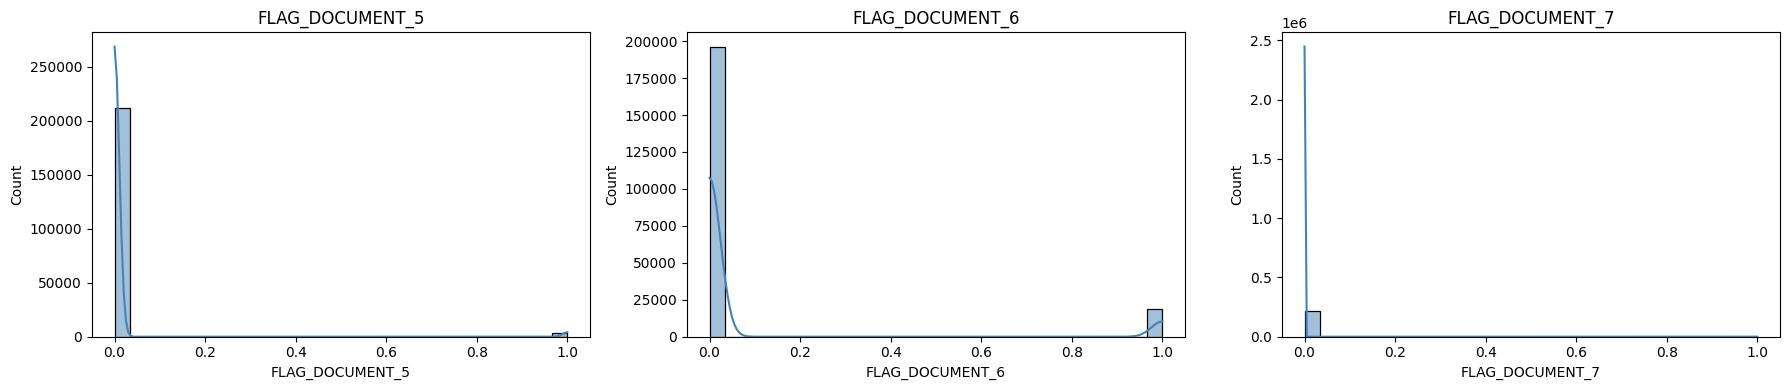

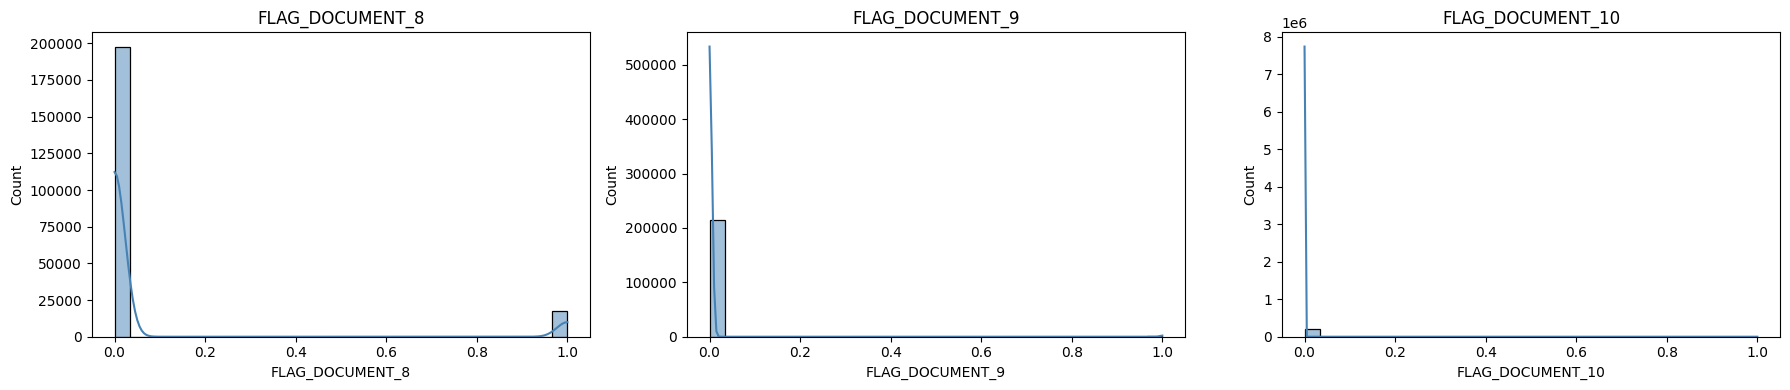

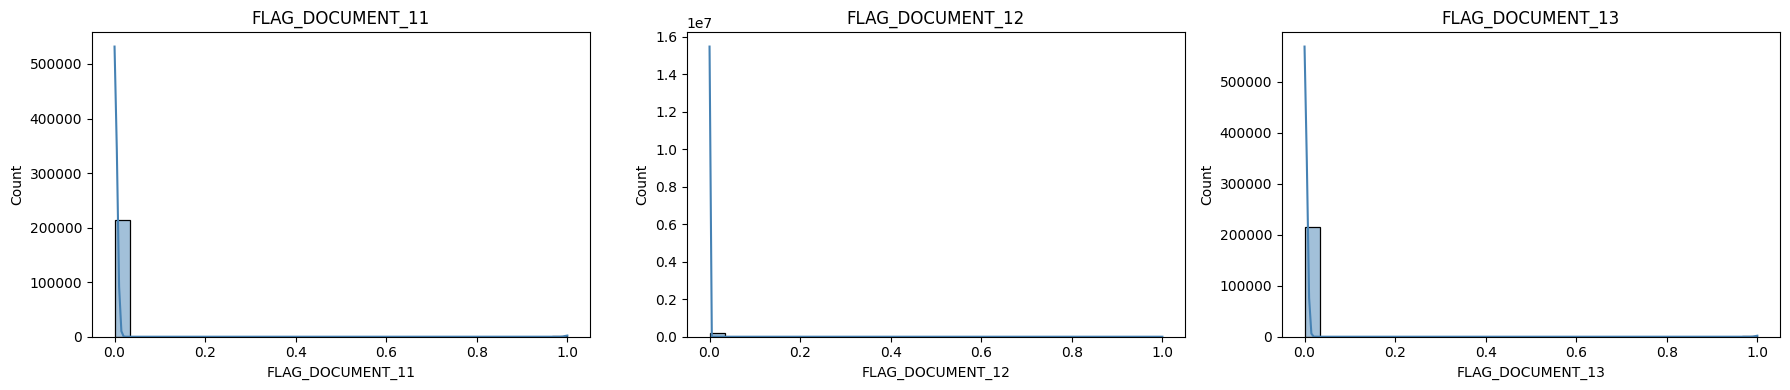

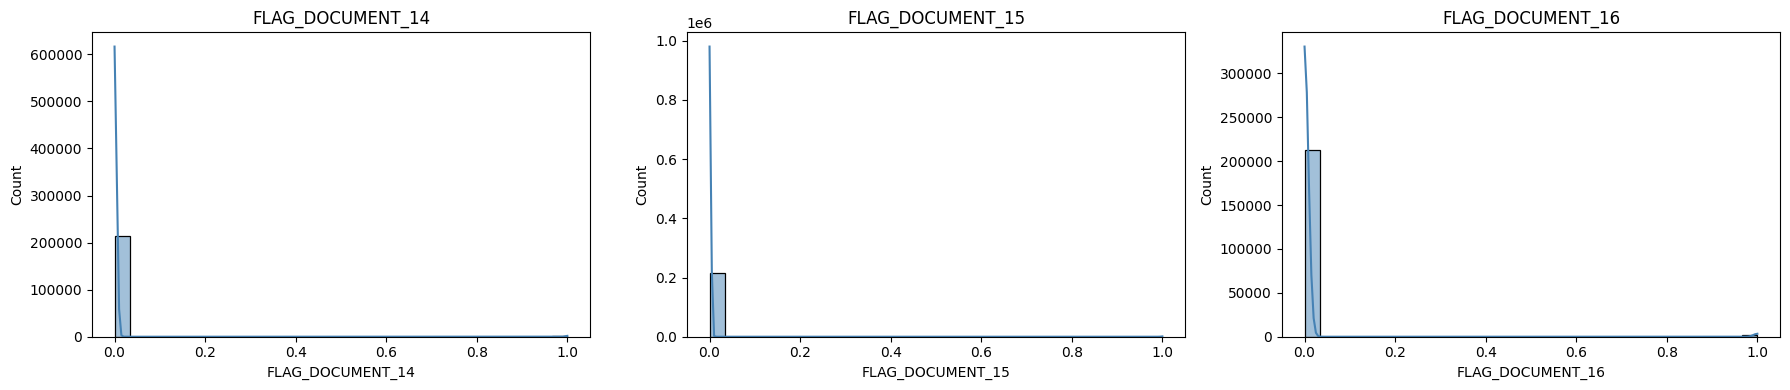

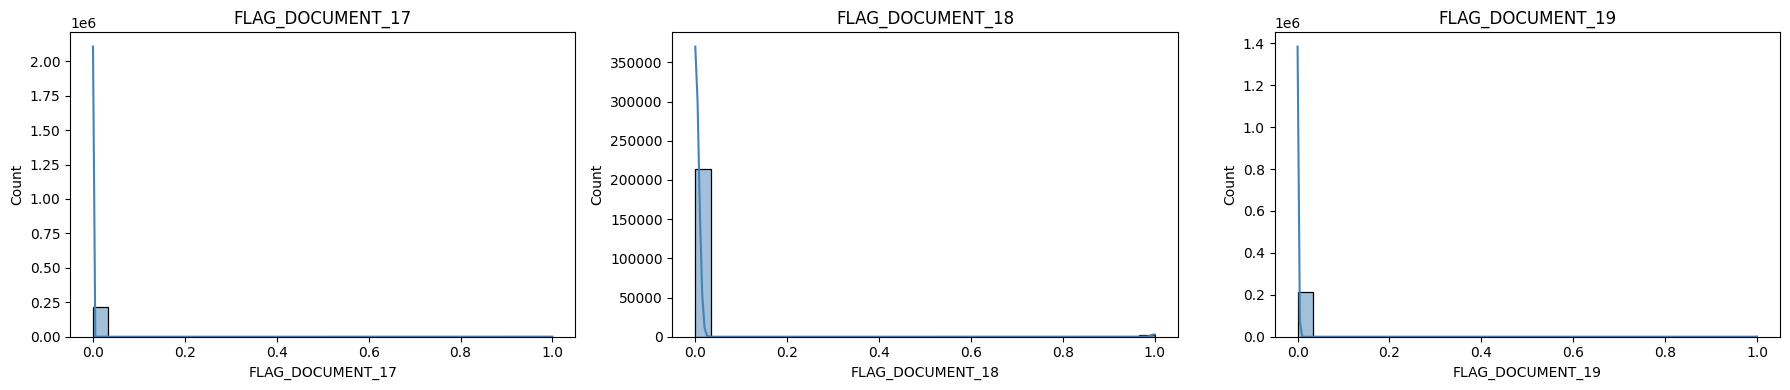

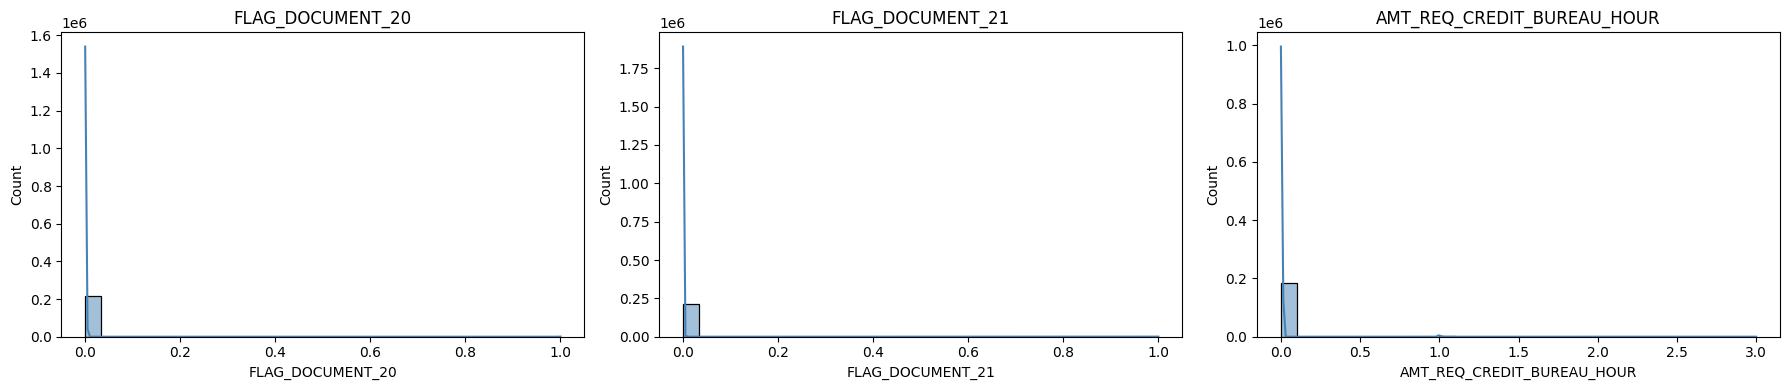

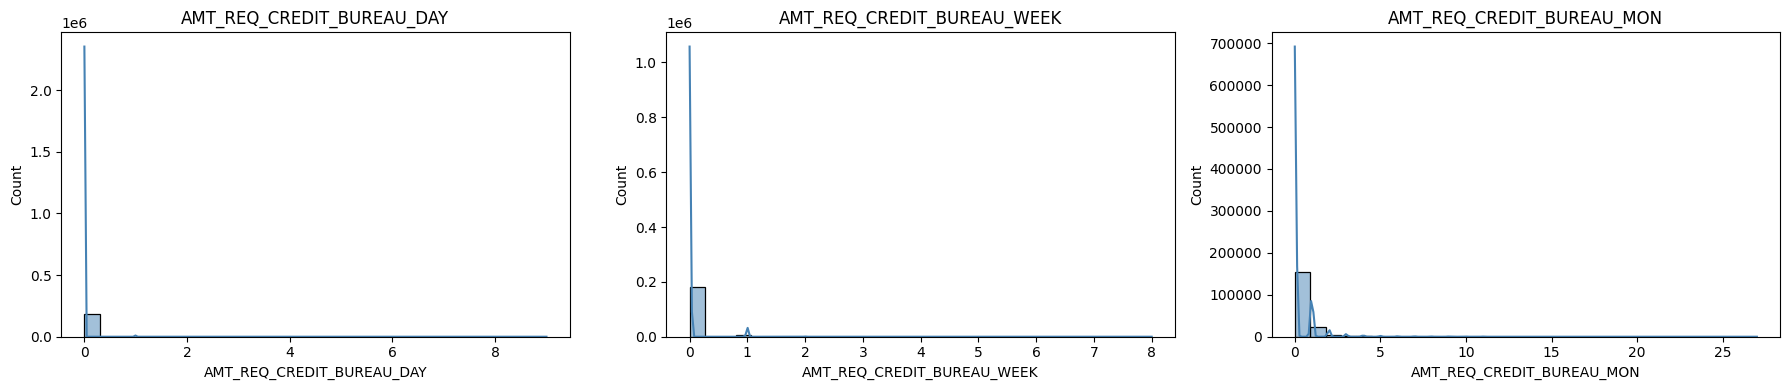

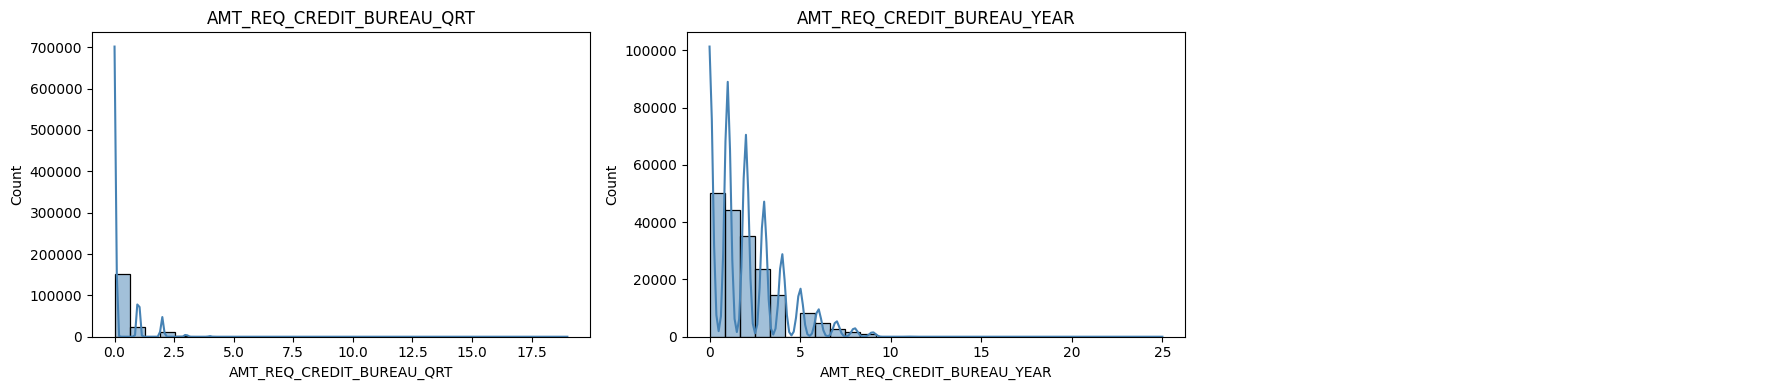

🔹 Análise Bivariada - Variáveis Categóricas vs Alvo


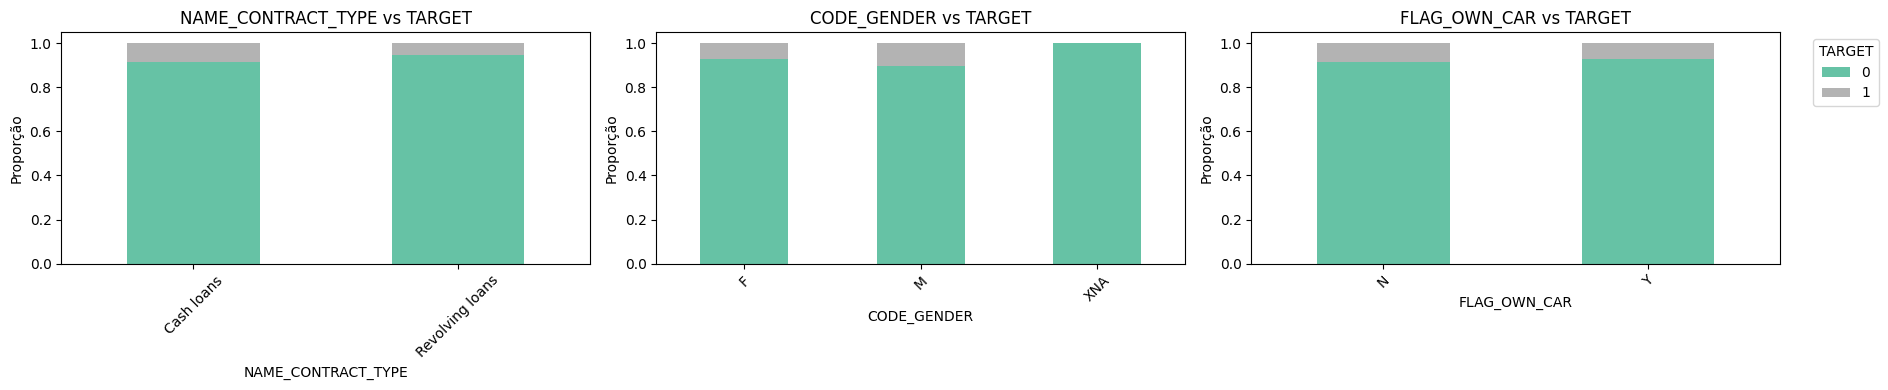

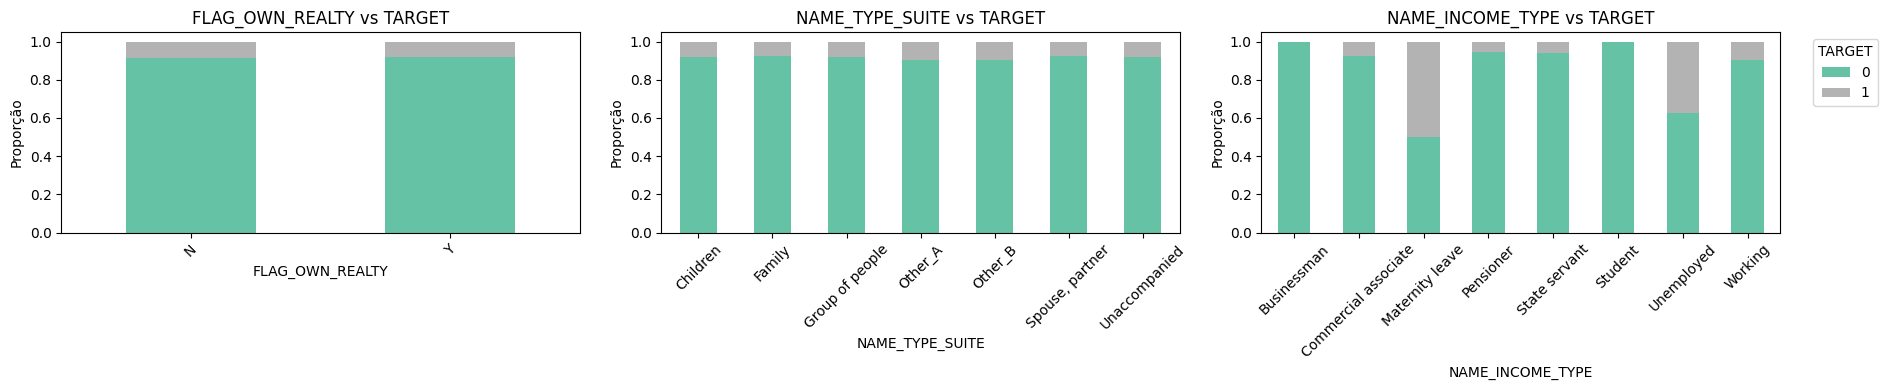

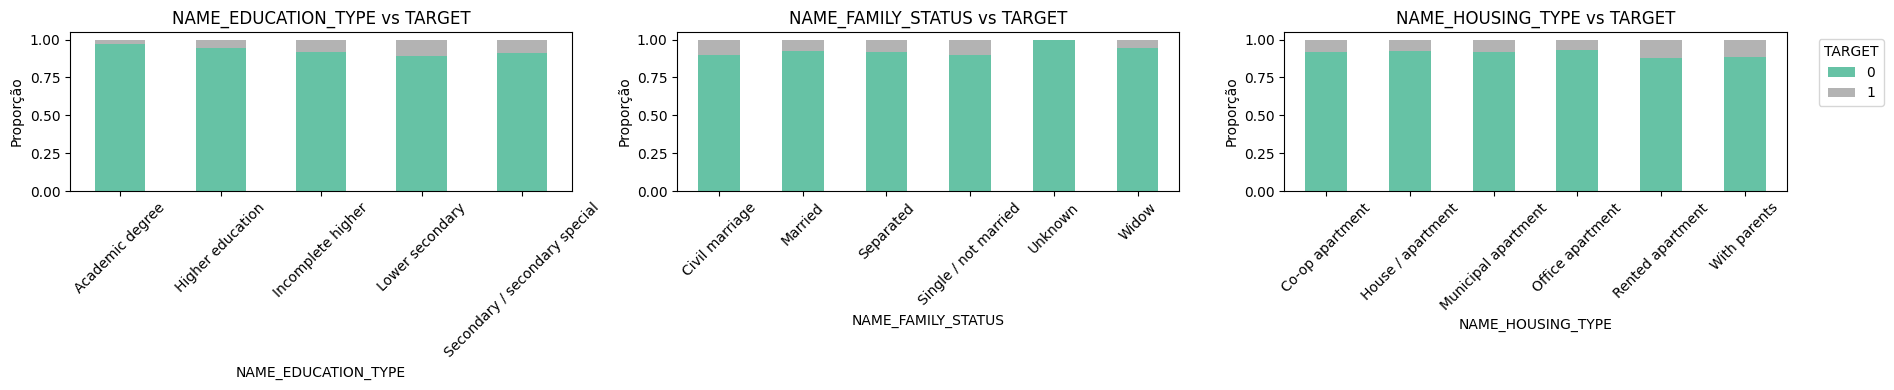

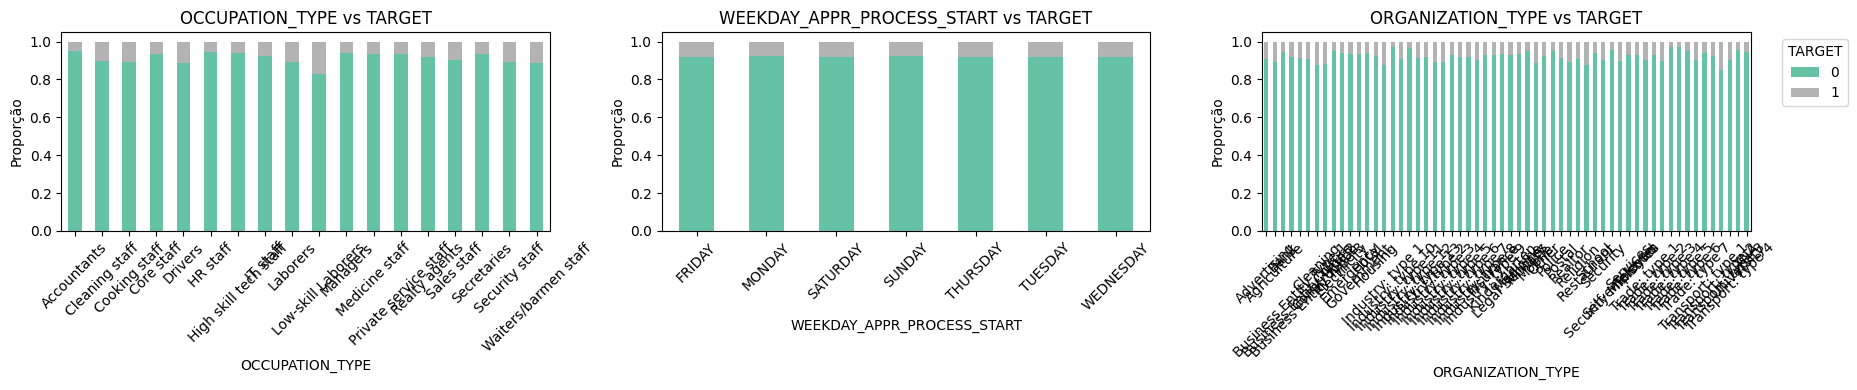

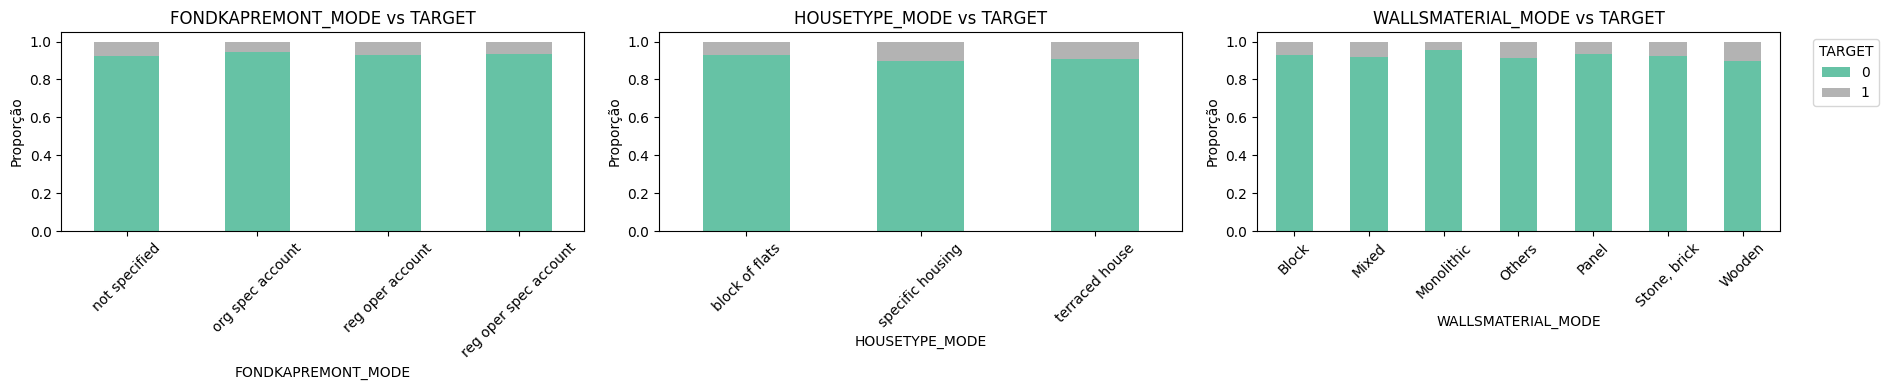

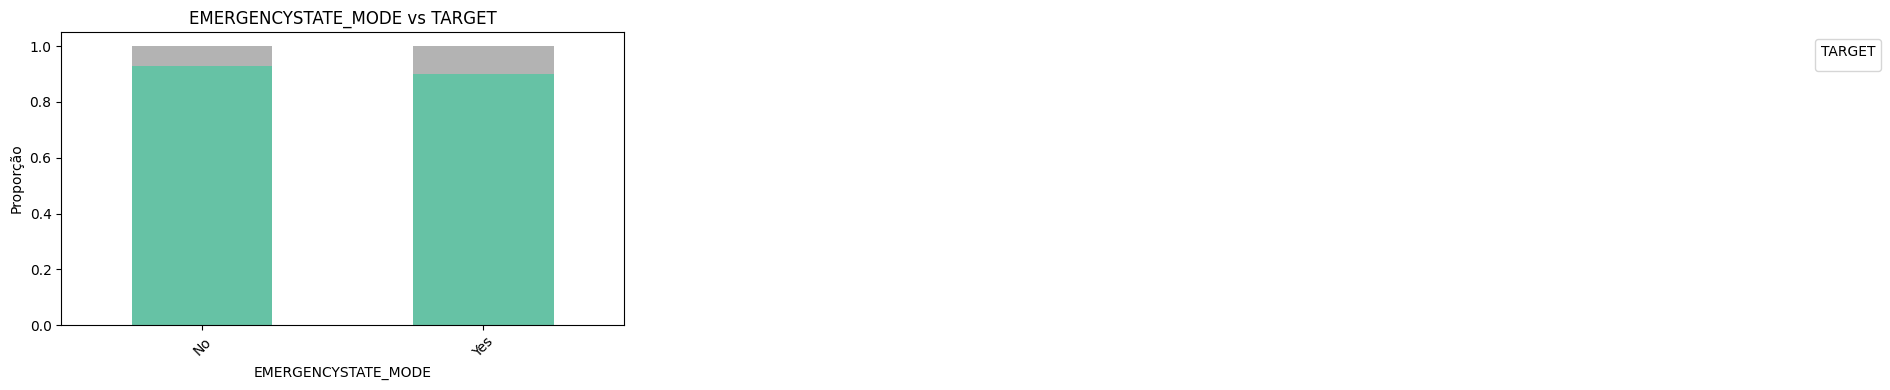

🔹 Análise Bivariada - Variáveis Numéricas vs Alvo


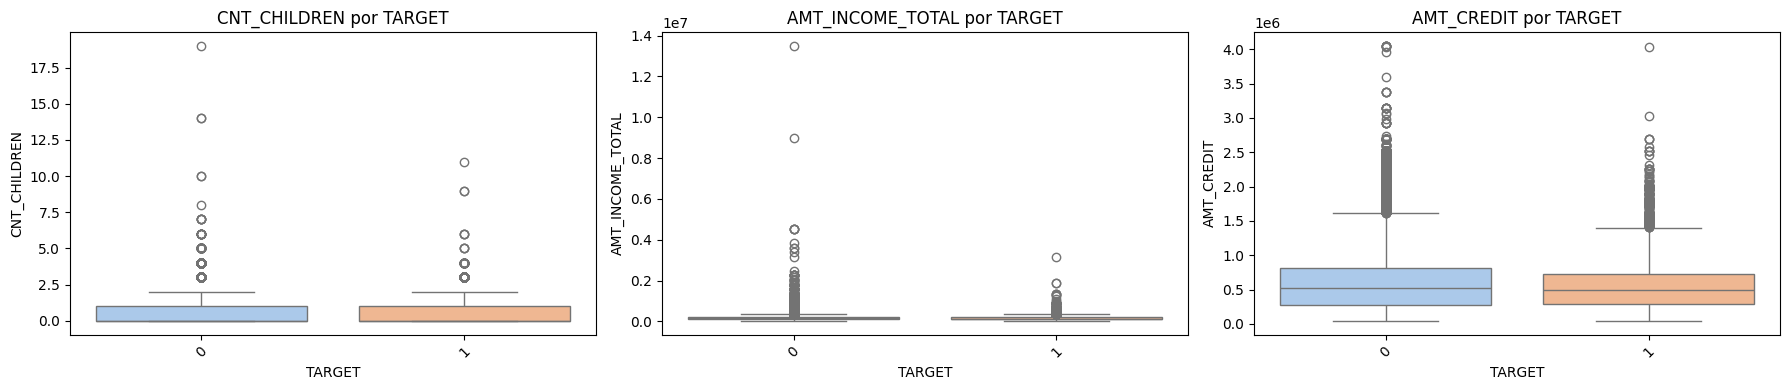

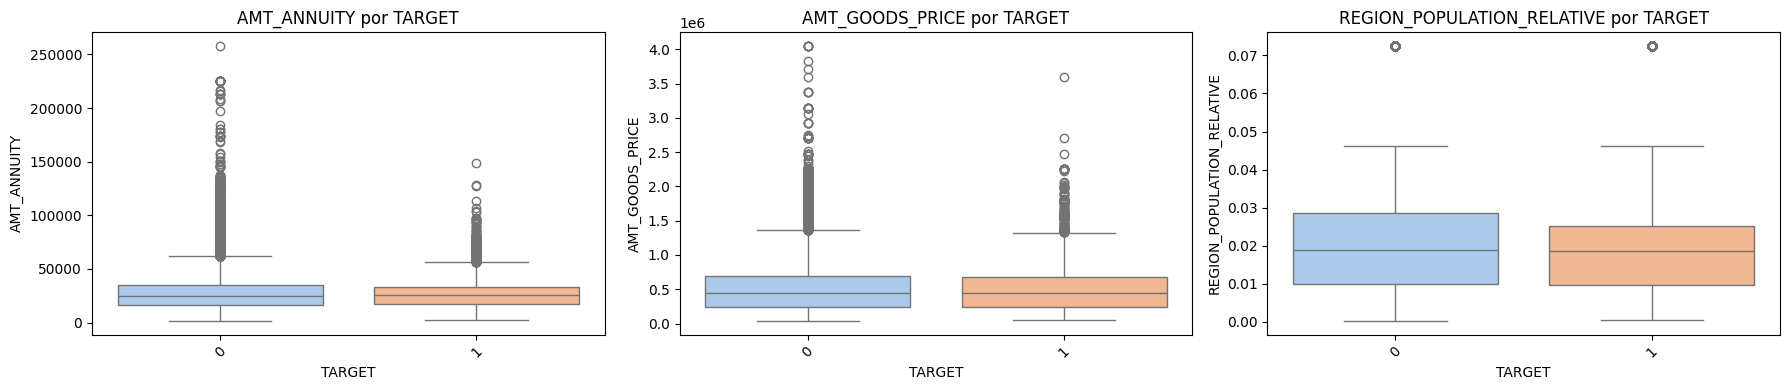

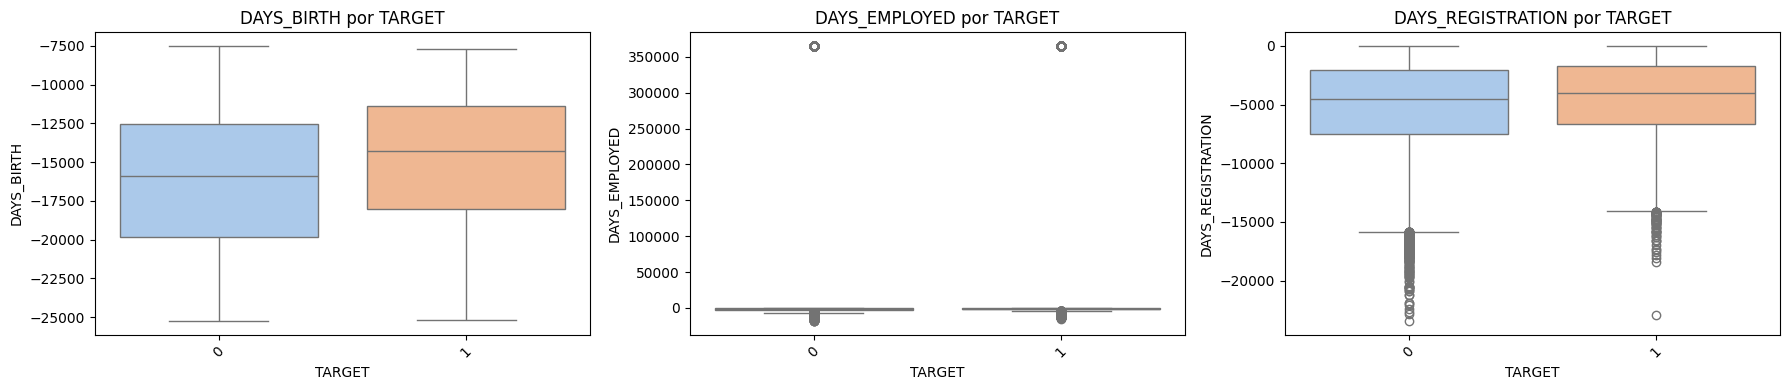

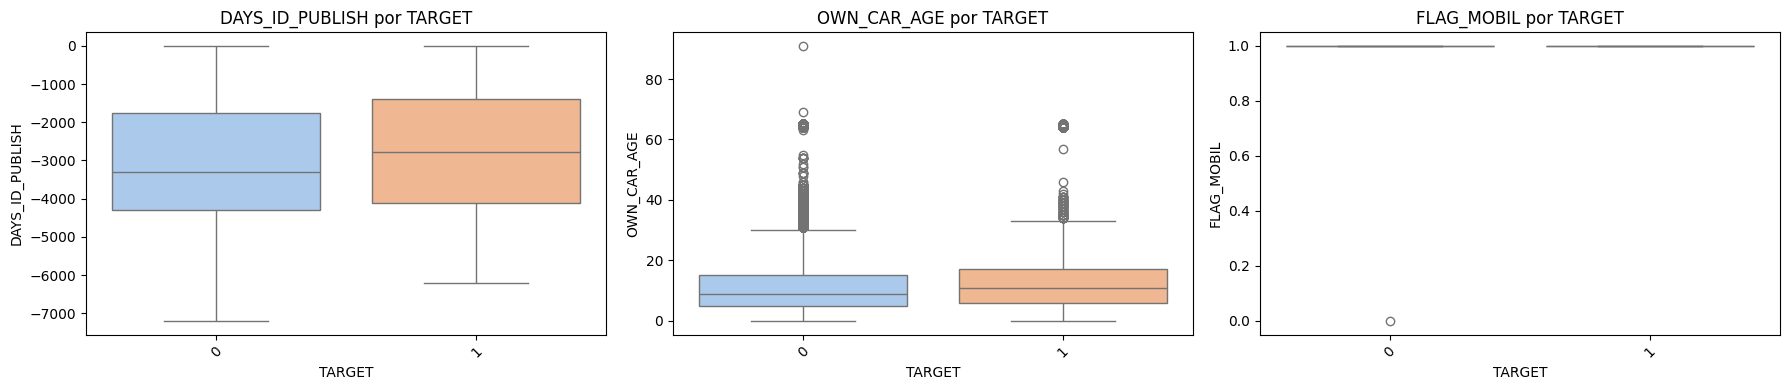

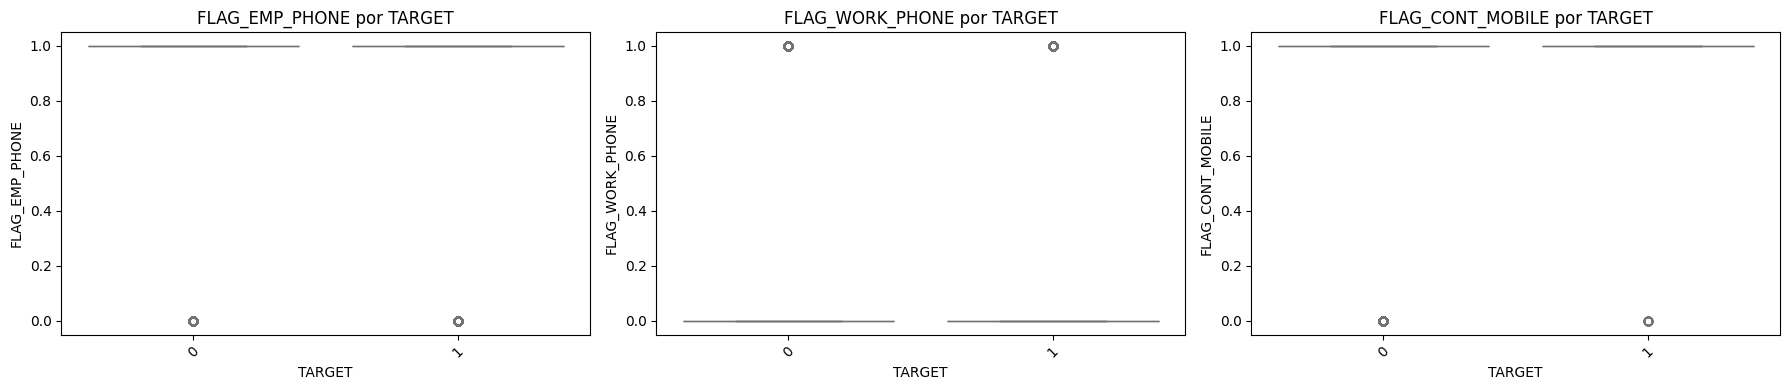

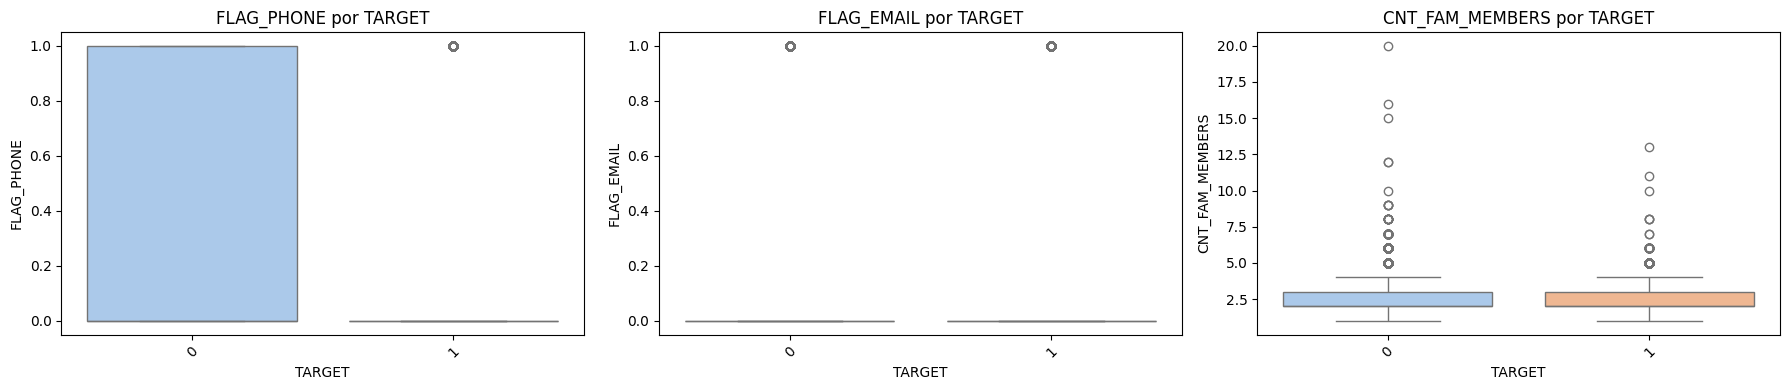

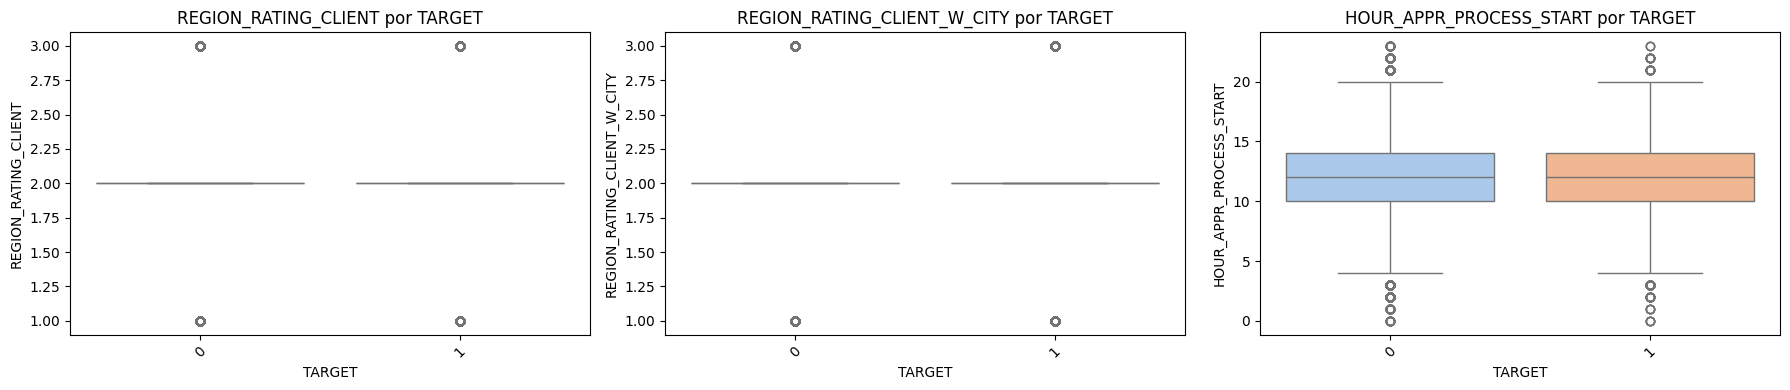

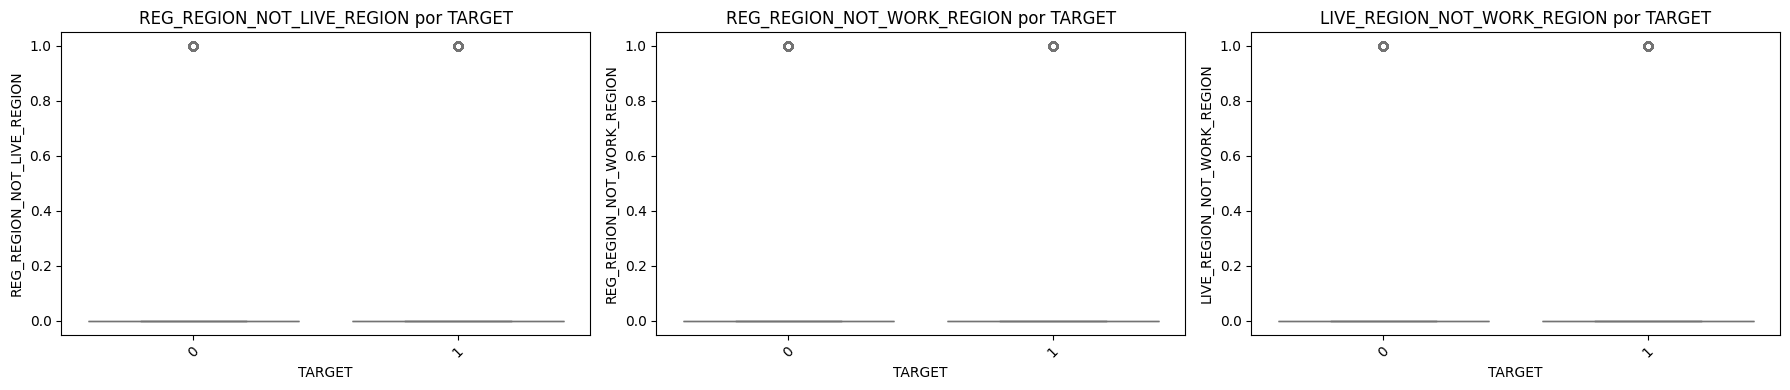

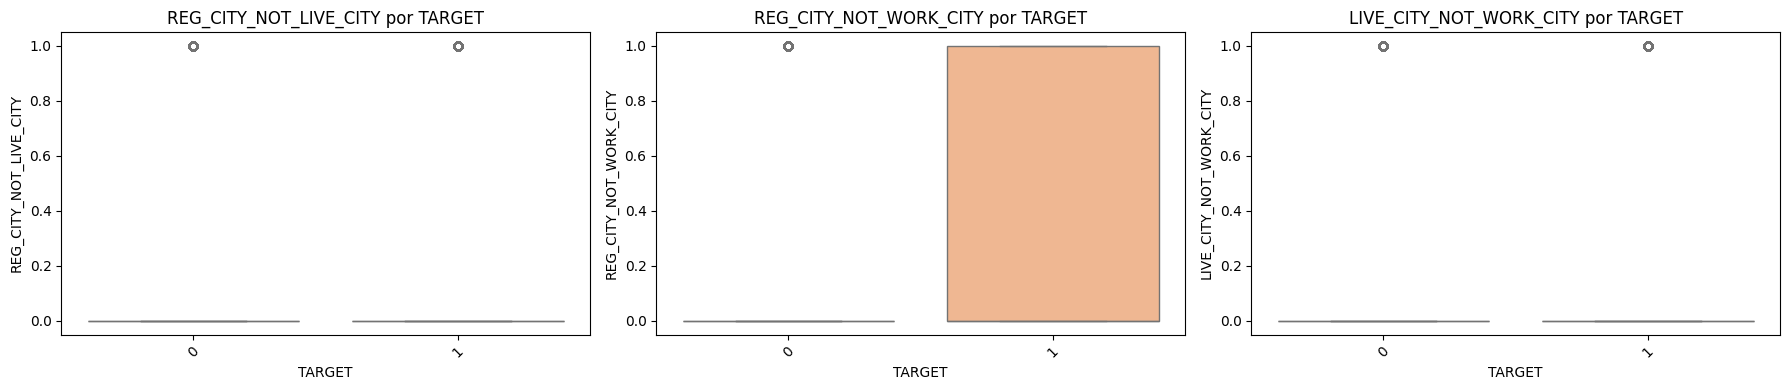

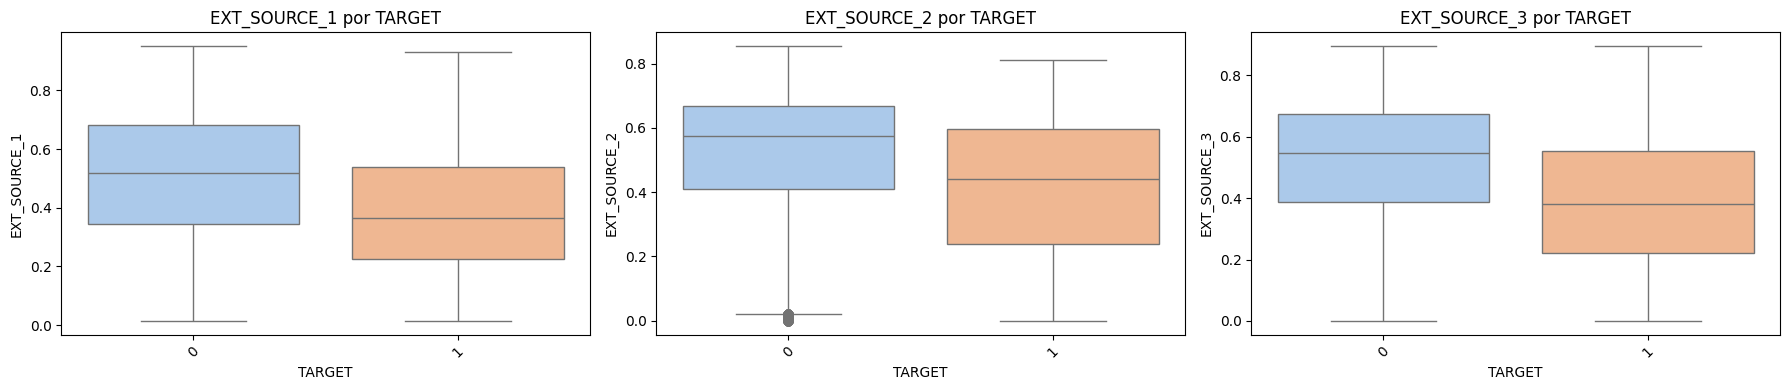

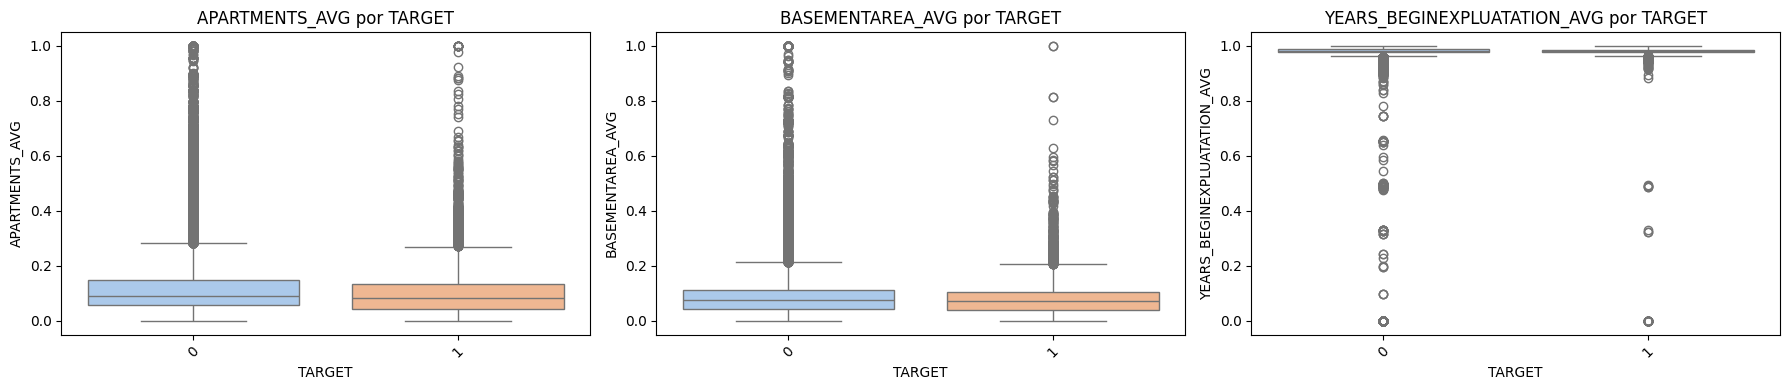

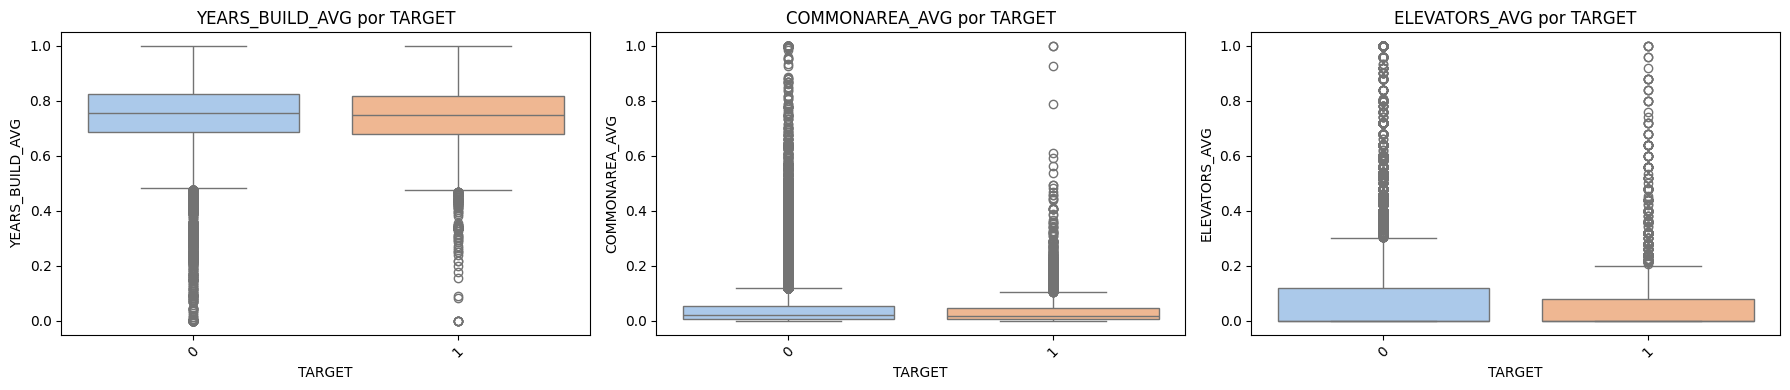

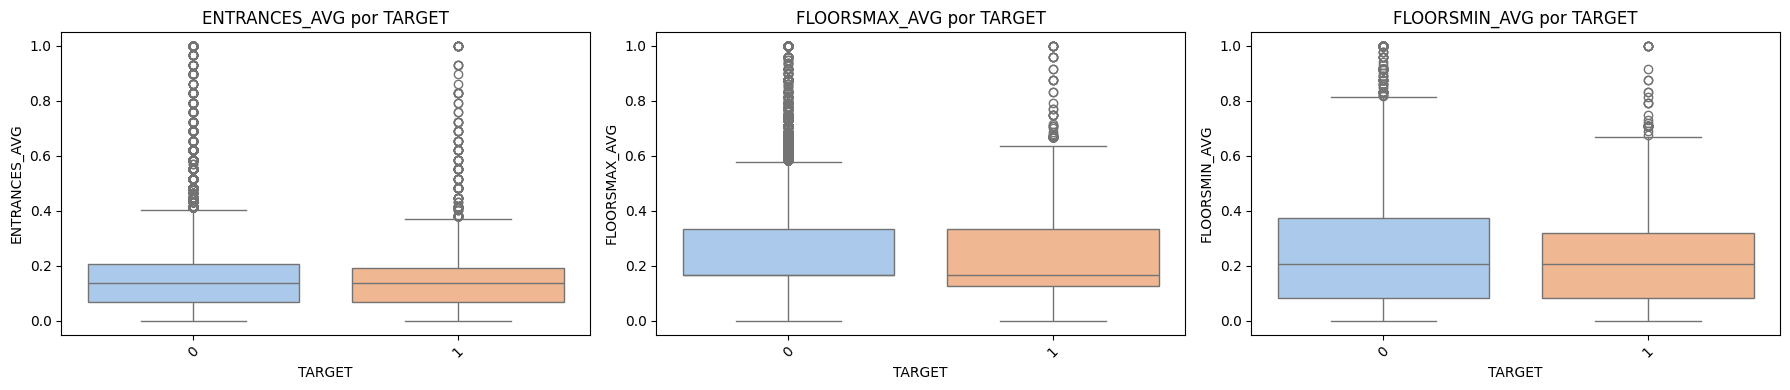

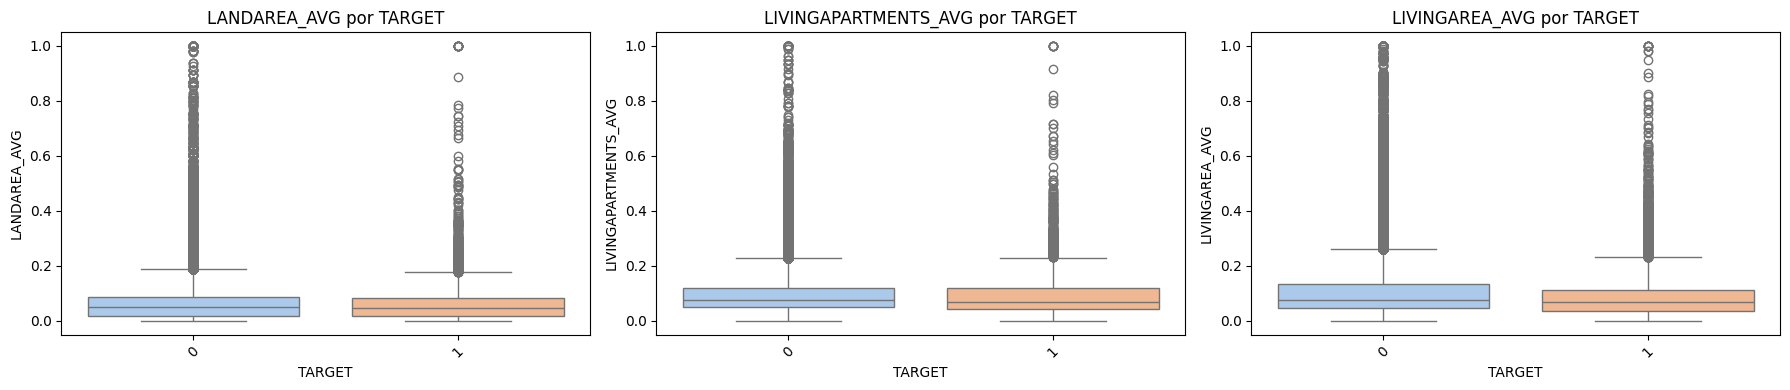

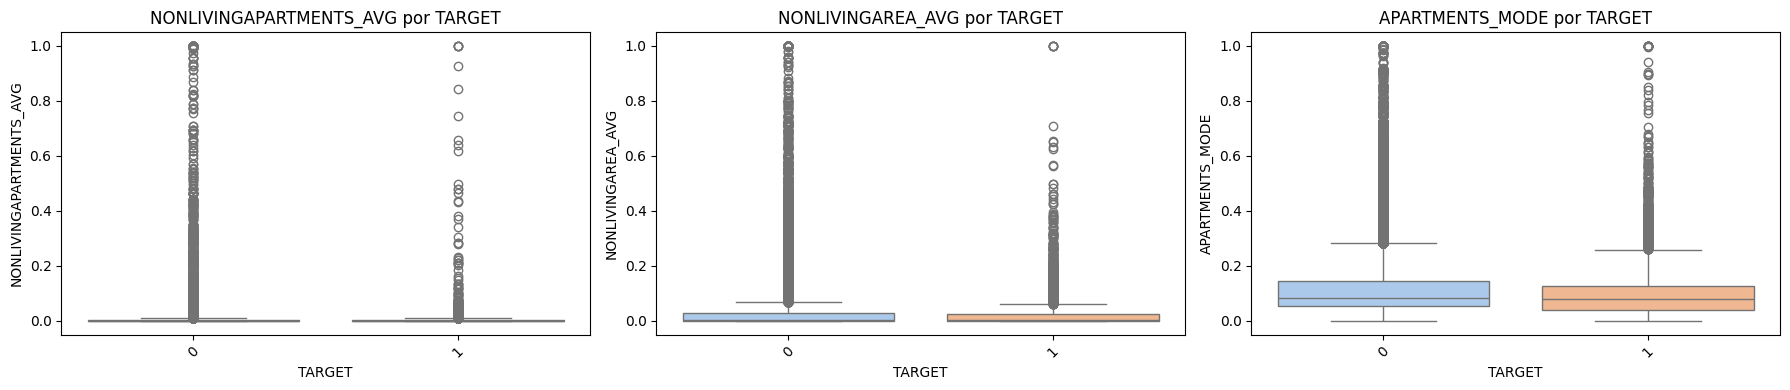

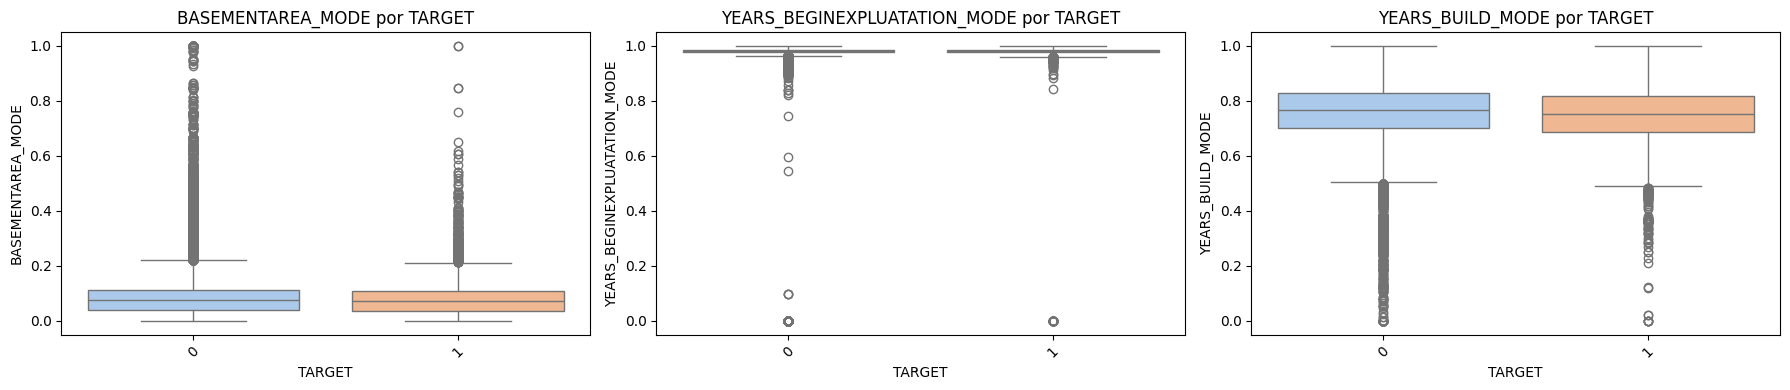

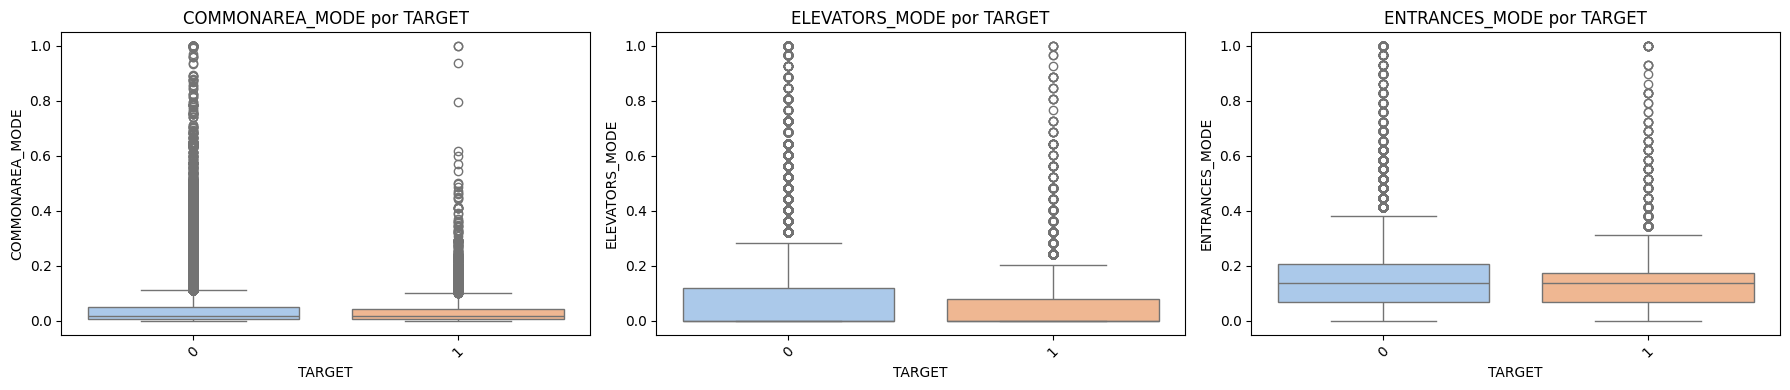

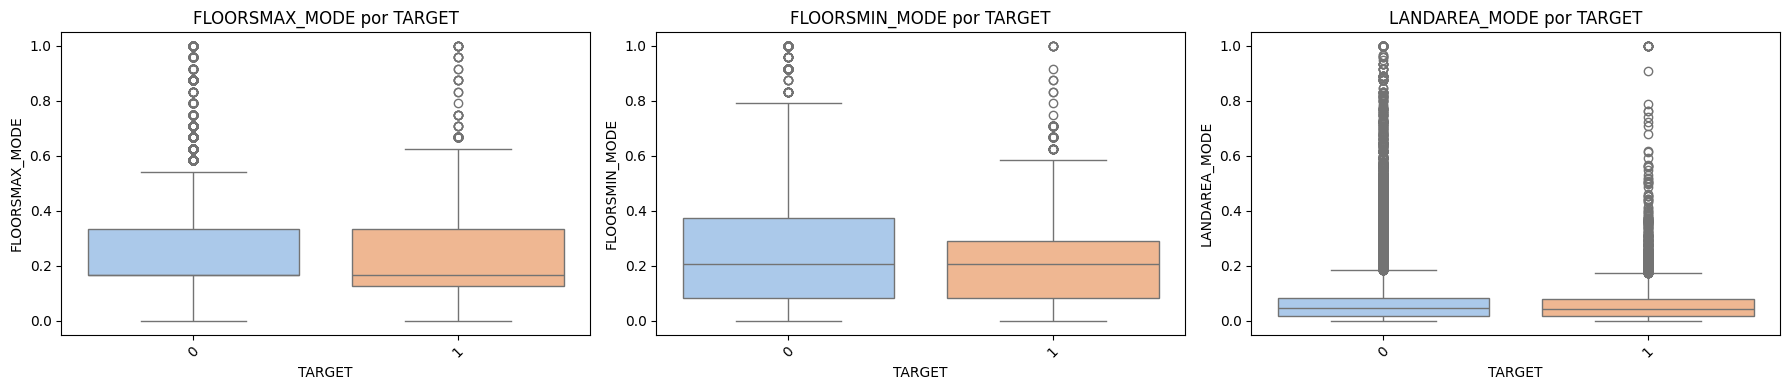

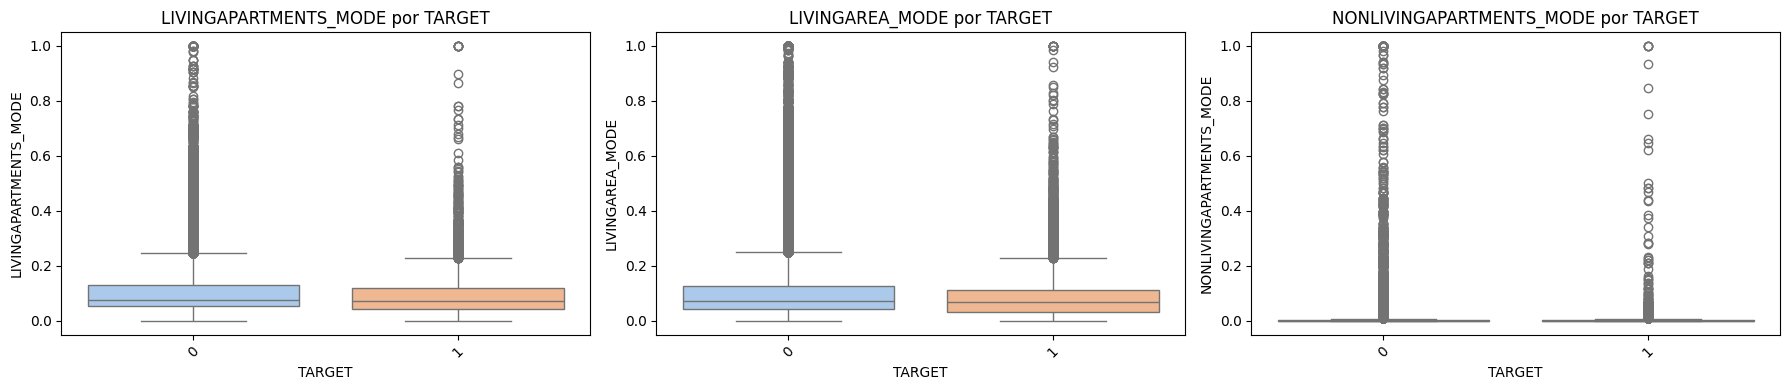

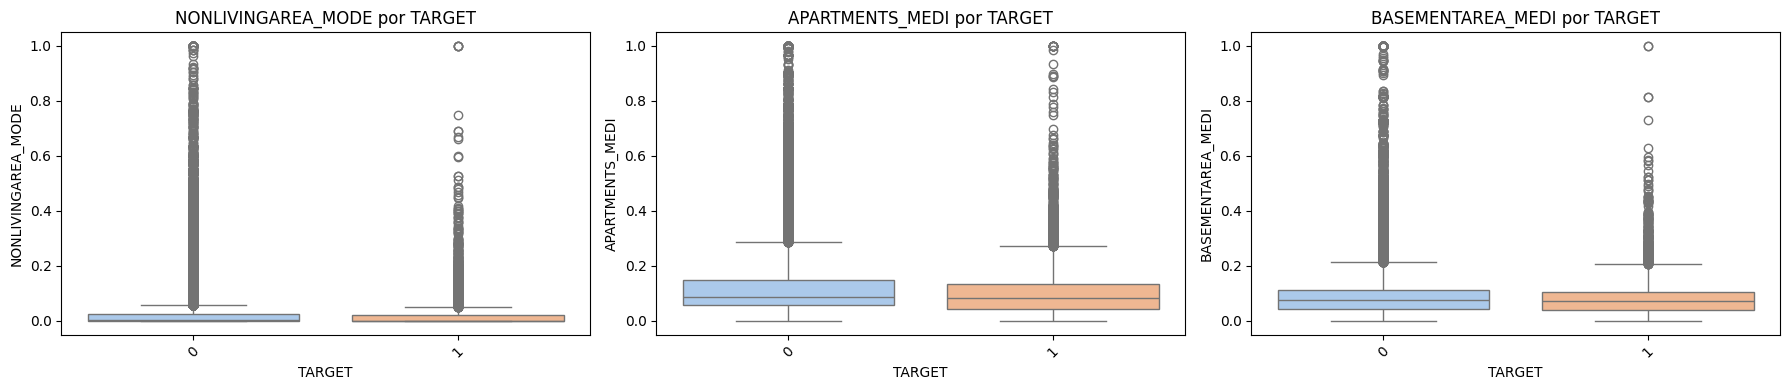

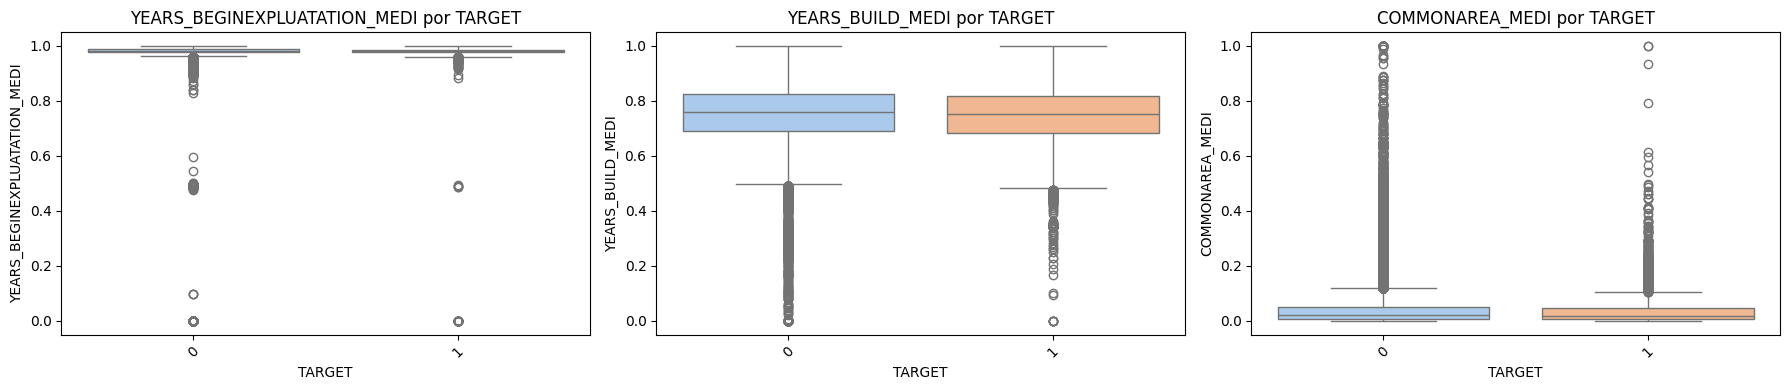

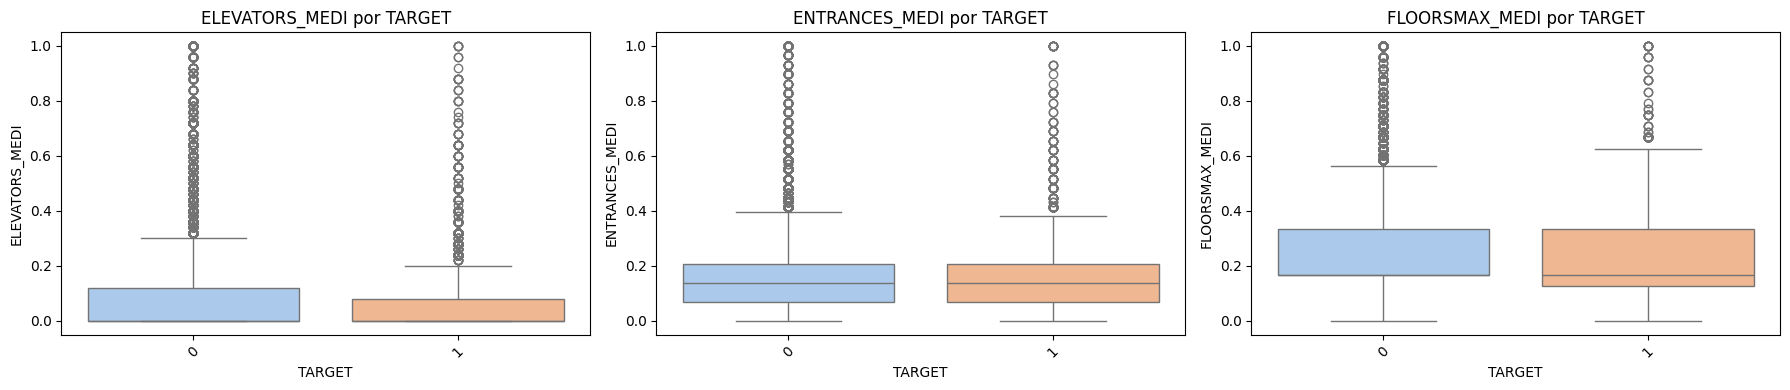

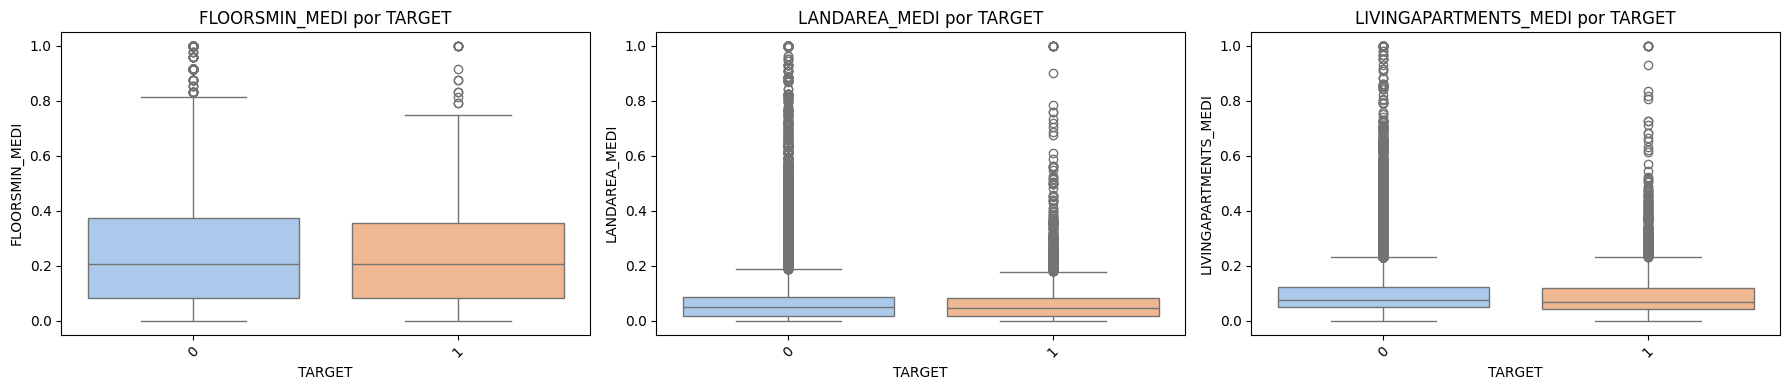

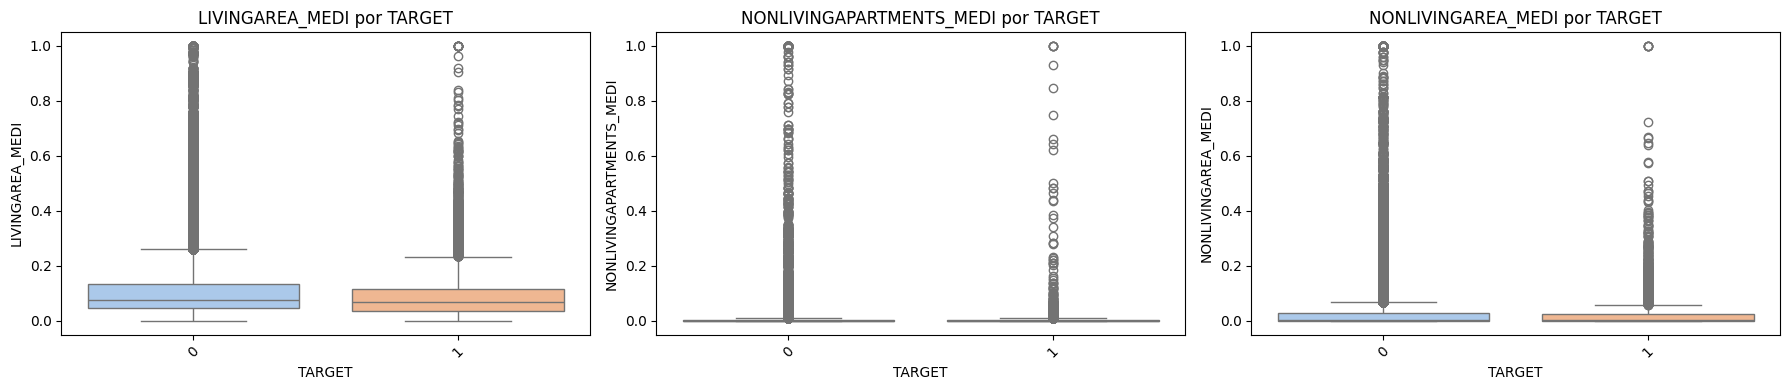

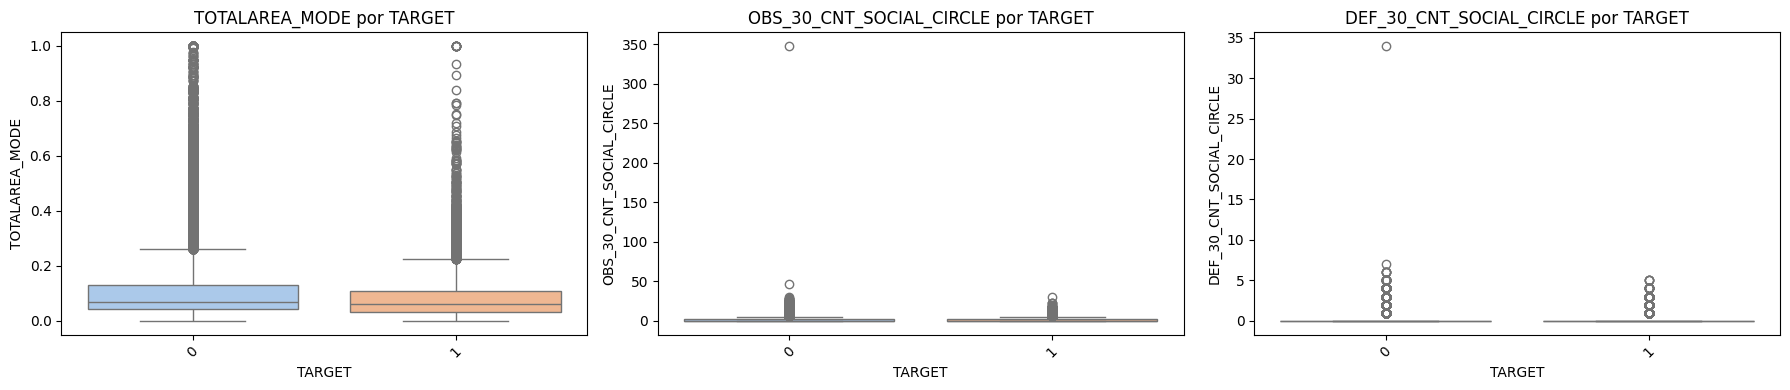

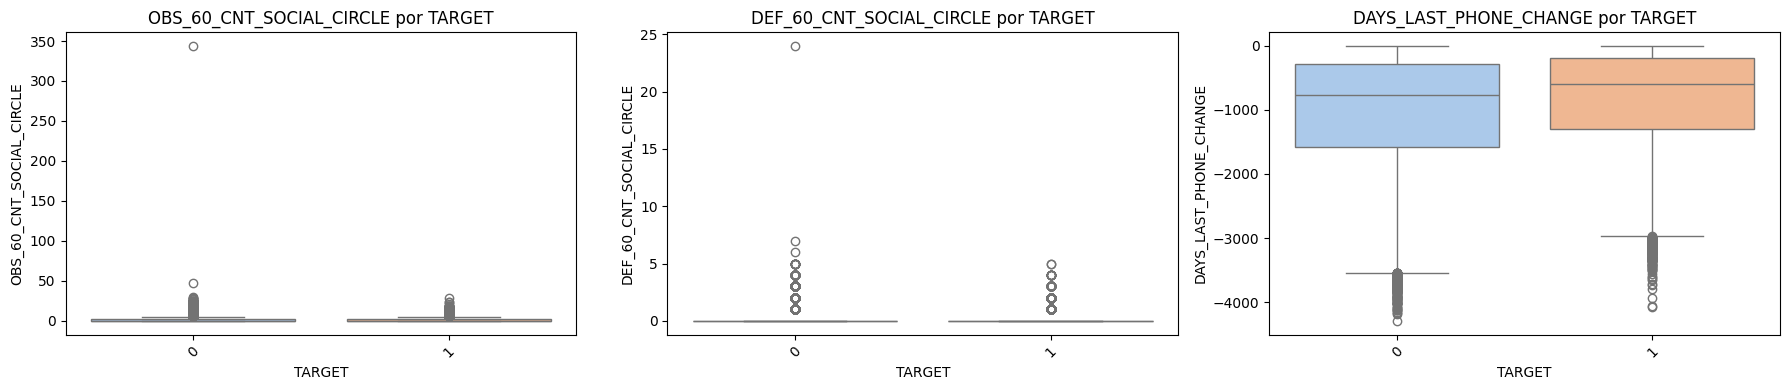

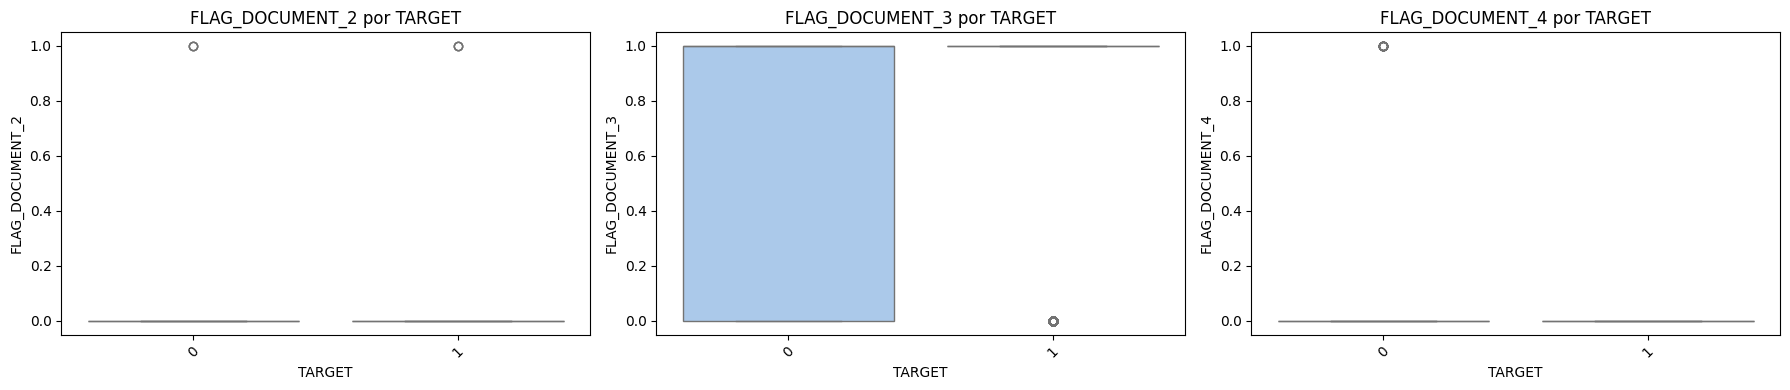

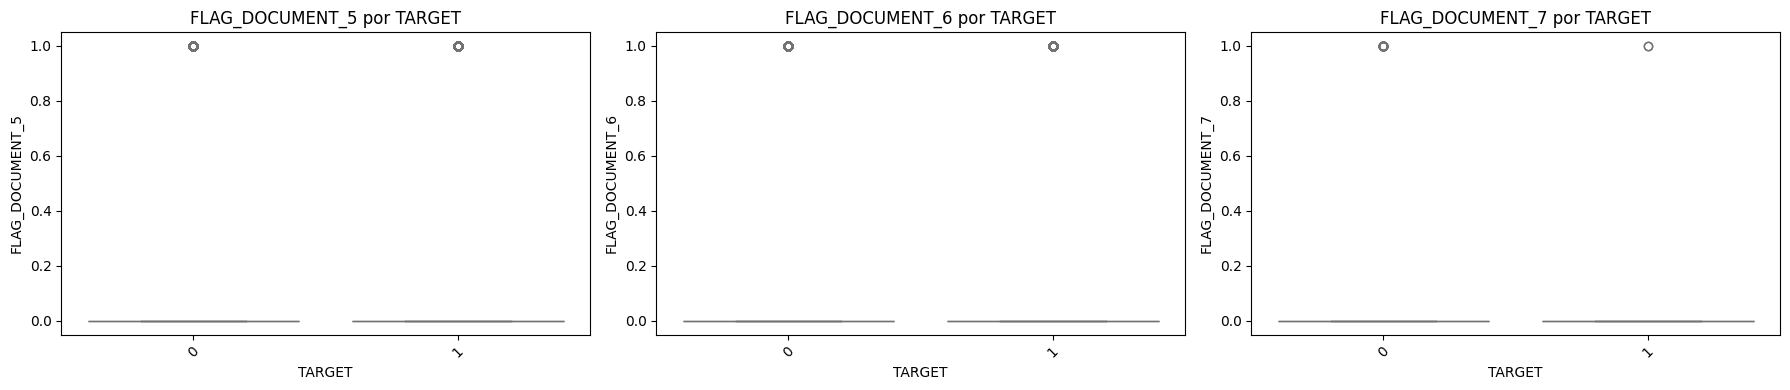

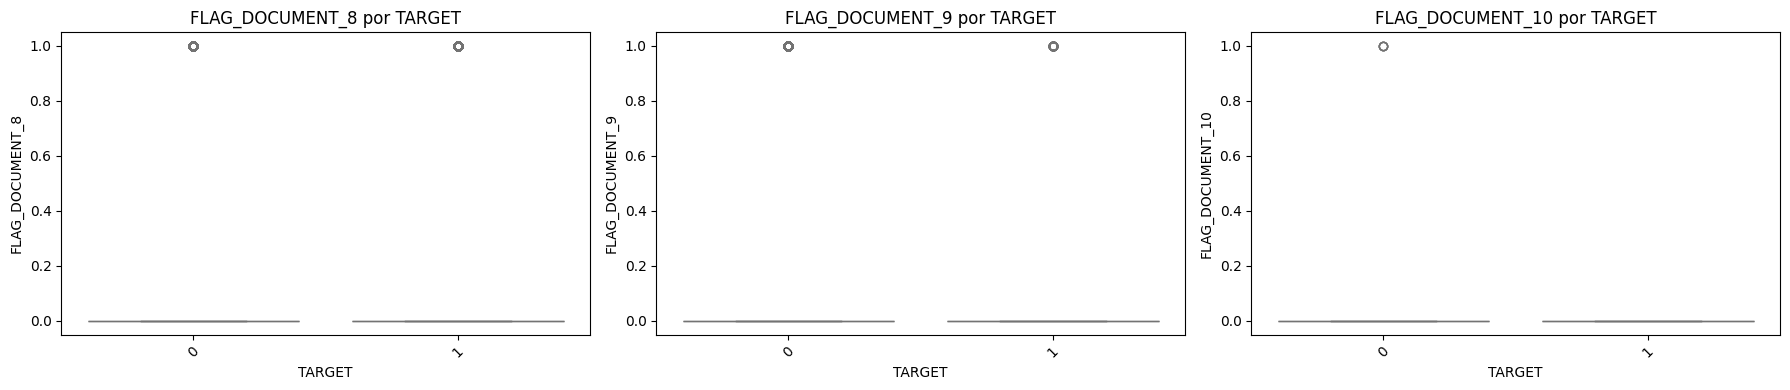

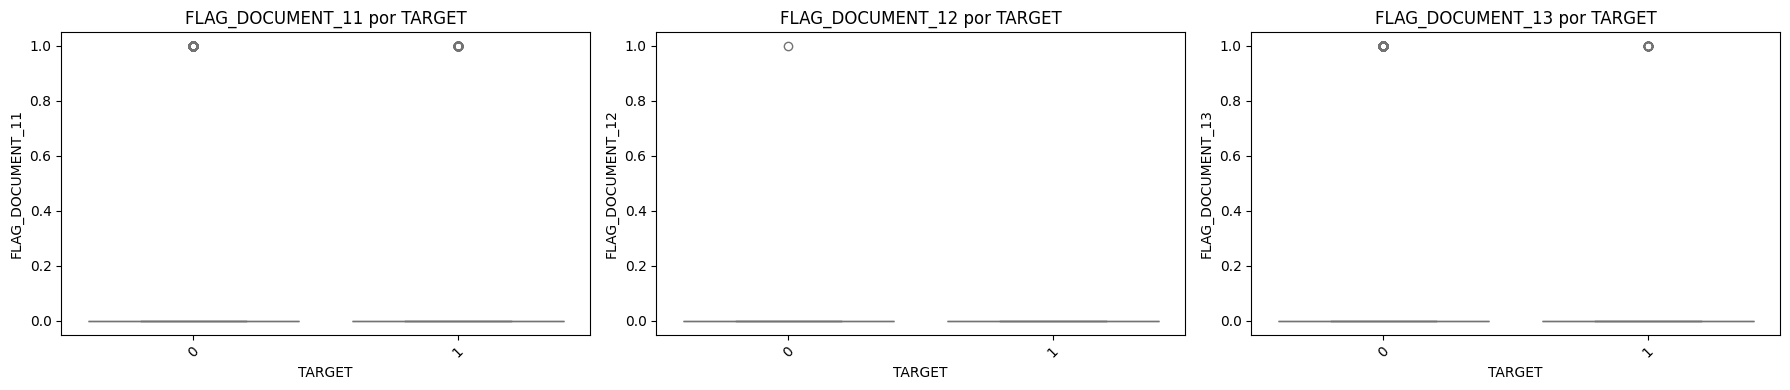

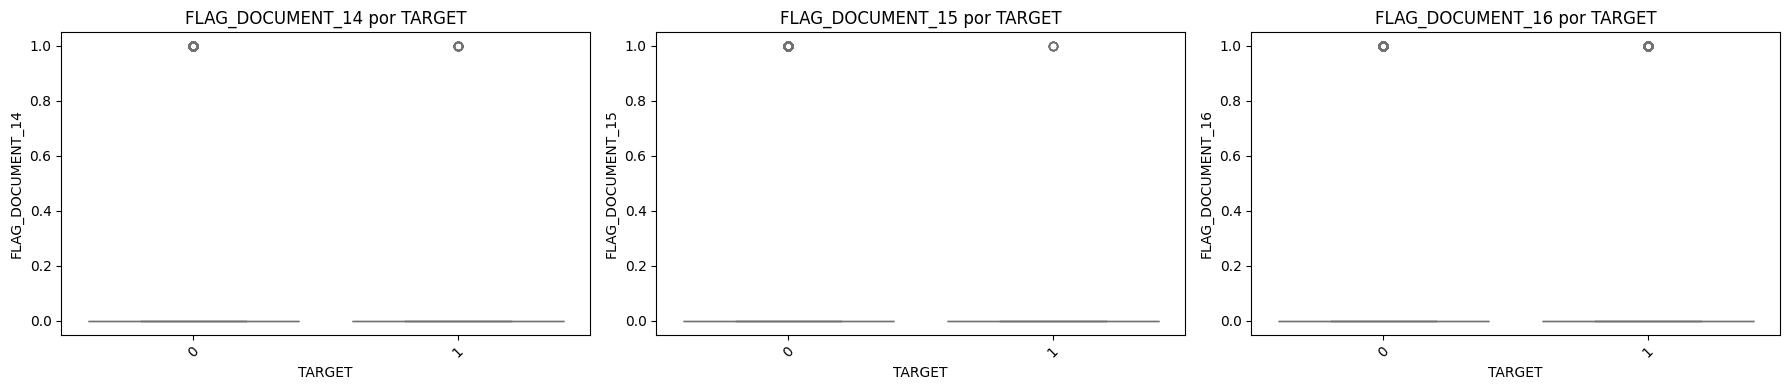

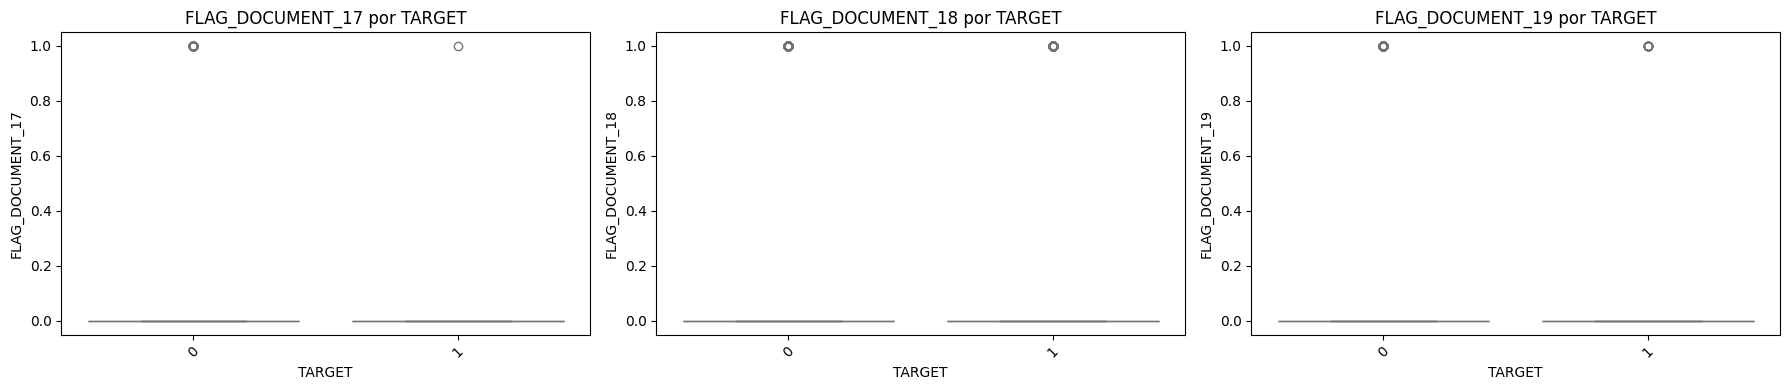

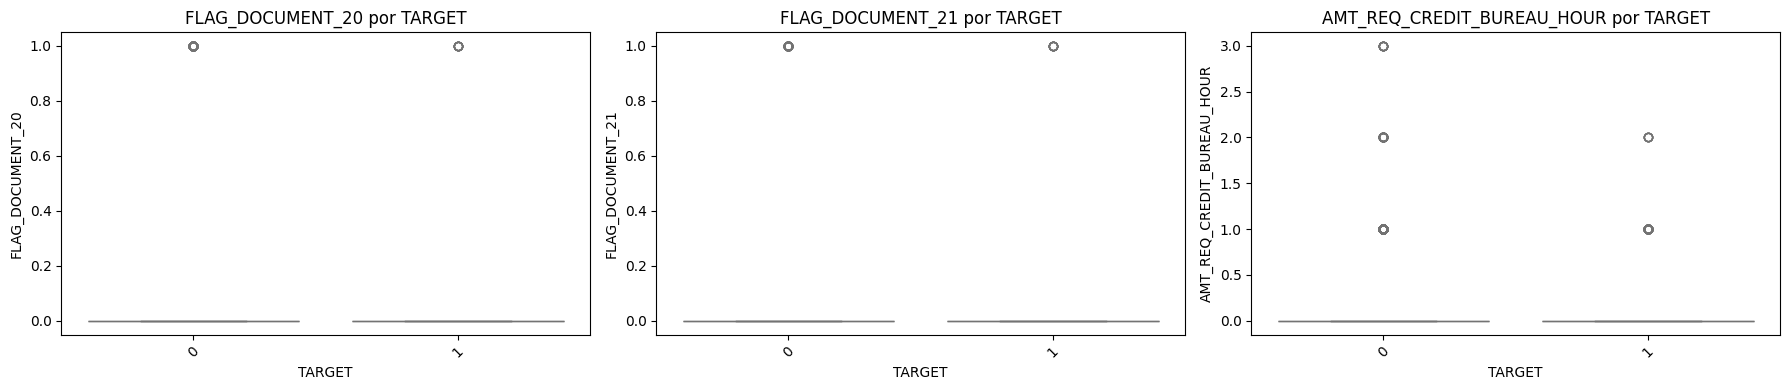

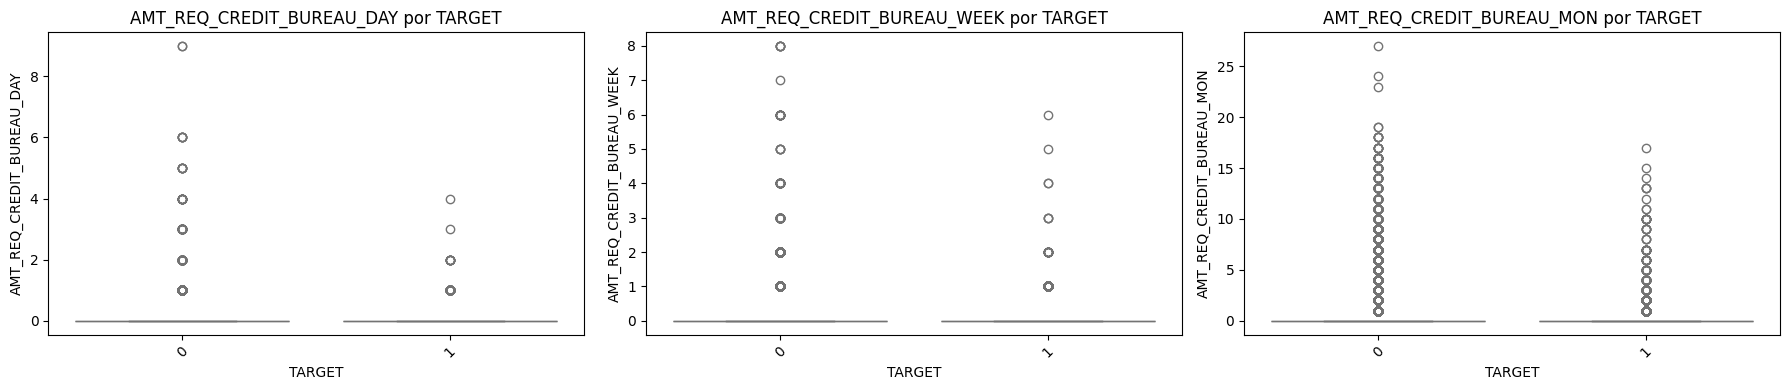

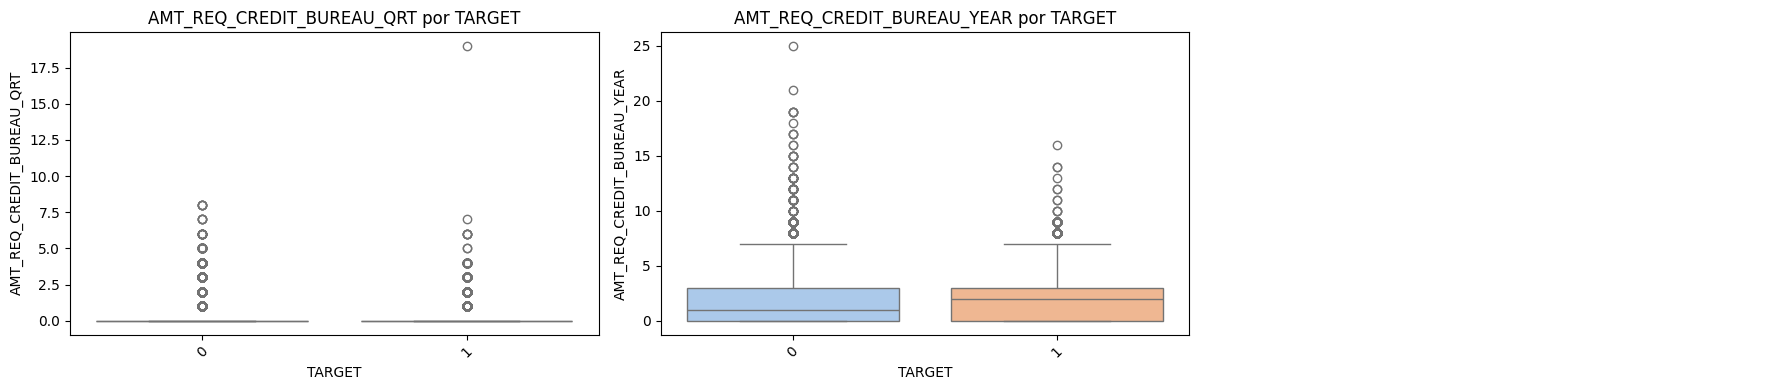

In [8]:
import math
# Variáveis de interesse
target = 'TARGET'
application_01 = application_00.copy()
application_01 = application_01.drop(columns=['SK_ID_CURR'])

categorical_vars = application_01.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_vars = application_01.select_dtypes(exclude=['object', 'category']).columns.tolist()

# Remove o target da lista de variáveis categóricas
if target in numerical_vars:
    numerical_vars.remove(target)

# --------------------
# Execução das análises
# --------------------

print("🔹 Análise Univariada - Variáveis Categóricas")
univariate_categorical(application_01, categorical_vars)

print("🔹 Análise Univariada - Variáveis Numéricas")
univariate_numerical(application_01, numerical_vars)

print("🔹 Análise Bivariada - Variáveis Categóricas vs Alvo")
bivariate_categorical_target(application_01, categorical_vars, target)

print("🔹 Análise Bivariada - Variáveis Numéricas vs Alvo")
bivariate_numerical_target(application_01, numerical_vars, target)



## Análise do público

### Quantidade de inadimplentes vs adimplentes

In [9]:
pod_count_categorias(application_01, ['NAME_CONTRACT_TYPE'])

NAME_CONTRACT_TYPE   Count  Percentage
0         Cash loans  194663   90.432831
1    Revolving loans   20594    9.567169
2              Total  215257  100.000000

In [10]:
pod_count_categorias(application_01[application_01['NAME_CONTRACT_TYPE'] == 'Revolving loans'], ['TARGET'])

TARGET  Count  Percentage
0      0  19474   94.561523
1      1   1120    5.438477
2  Total  20594  100.000000

In [11]:
pod_count_categorias(application_01[application_01['NAME_CONTRACT_TYPE'] == 'Cash loans'], ['TARGET'])

TARGET   Count  Percentage
0      0  178371   91.630664
1      1   16292    8.369336
2  Total  194663  100.000000

### Renda

In [13]:
application_01['AMT_INCOME_TOTAL'].describe().round(2)

count      215257.00
mean       168556.85
std        105855.72
min         25650.00
25%        112500.00
50%        144000.00
75%        202500.00
max      13500000.00
Name: AMT_INCOME_TOTAL, dtype: float64

### Idade

In [14]:
application_01['IDADE_ANOS'] = (-1)*application_01['DAYS_BIRTH']/360
application_01['IDADE_ANOS'].describe().round(2)

count    215257.00
mean         44.54
std          12.12
min          20.80
25%          34.47
50%          43.75
75%          54.67
max          70.08
Name: IDADE_ANOS, dtype: float64

### Nível escolar

In [15]:
pod_count_categorias(application_01, ['NAME_EDUCATION_TYPE'])

NAME_EDUCATION_TYPE   Count  Percentage
0  Secondary / secondary special  152634   70.907799
1               Higher education   52664   24.465639
2              Incomplete higher    7169    3.330438
3                Lower secondary    2673    1.241771
4                Academic degree     117    0.054354
5                          Total  215257  100.000000

### Valor do empréstimo

In [16]:
application_01['AMT_CREDIT'].describe().round(2)

count     215257.00
mean      599496.00
std       402898.91
min        45000.00
25%       270000.00
50%       514867.50
75%       808650.00
max      4050000.00
Name: AMT_CREDIT, dtype: float64

### Ocupação

In [17]:
pod_count_categorias(application_01, ['OCCUPATION_TYPE'])

OCCUPATION_TYPE   Count  Percentage
0                Laborers   38710   26.182295
1             Sales staff   22344   15.112819
2              Core staff   19317   13.065446
3                Managers   14976   10.129322
4                 Drivers   13030    8.813105
5   High skill tech staff    8055    5.448163
6             Accountants    6861    4.640577
7          Medicine staff    5983    4.046724
8          Security staff    4738    3.204643
9           Cooking staff    4090    2.766355
10         Cleaning staff    3272    2.213084
11  Private service staff    1862    1.259402
12     Low-skill Laborers    1461    0.988177
13   Waiters/barmen staff     935    0.632406
14            Secretaries     929    0.628348
15          Realty agents     527    0.356447
16               HR staff     398    0.269195
17               IT staff     360    0.243493
18                  Total  147848  100.000000

### Membros na família

In [18]:
application_01['CNT_FAM_MEMBERS'].describe().round(2)

count    215256.00
mean          2.15
std           0.91
min           1.00
25%           2.00
50%           2.00
75%           3.00
max          20.00
Name: CNT_FAM_MEMBERS, dtype: float64

In [19]:
pod_count_categorias(application_01, ['CNT_FAM_MEMBERS'])

CNT_FAM_MEMBERS   Count  Percentage
0              2.0  110958   51.546995
1              1.0   47338   21.991489
2              3.0   36873   17.129836
3              4.0   17346    8.058312
4              5.0    2389    1.109841
5              6.0     273    0.126826
6              7.0      53    0.024622
7              8.0      13    0.006039
8              9.0       4    0.001858
9             10.0       2    0.000929
10            12.0       2    0.000929
11            11.0       1    0.000465
12            13.0       1    0.000465
13            15.0       1    0.000465
14            16.0       1    0.000465
15            20.0       1    0.000465
16           Total  215256  100.000000

## Análise IV das variáveis selecionadas no processo de modelagem Reg.Log.

In [20]:
df_treino_full = pd.read_parquet('../data/abt/abt_train', engine='fastparquet')
df_treino_full.shape

(215257, 552)

In [21]:
import pickle
with open('../artifacts/prd_first_list_features.pkl', 'rb') as f:
    colunas_finais = pickle.load(f)

In [22]:
df_treino_full = df_treino_full[colunas_finais]
df_treino_full.shape

(215257, 161)

In [24]:
df_treino_full = df_treino_full[['EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'EXT_SOURCE_1',
 'OCCUPATION_TYPE',
 'DAYS_EMPLOYED',
 'AMT_GOODS_PRICE',
 'DAYS_LAST_PHONE_CHANGE',
 'QT_MIN_DAYS_CREDIT_ENDDATE_CRED_CURR_1_BUREAU',
 'NAME_EDUCATION_TYPE',
 'QT_MIN_DAYS_CREDIT_ENDDATE_CRED_ACT_CLD_BUREAU',
 'CODE_GENDER',
 'DAYS_ID_PUBLISH',
 'DAYS_REGISTRATION',
 'VL_TOT_AMT_CREDIT_SUM_CRED_ACT_CLD_BUREAU',
 'REGION_POPULATION_RELATIVE',
 'QT_MAX_DAYS_CREDIT_ENDDATE_U9M_BUREAU',
 'QT_MAX_DAYS_CREDIT_UPDATE_U12M_BUREAU',
 'OWN_CAR_AGE',
 'VL_TOT_AMT_CREDIT_MAX_OVERDUE_CRED_ACT_ACT_BUREAU',
 'QT_MAX_DAYS_CREDIT_UPDATE_CRED_ACT_ACT_BUREAU',
 'TARGET']]

In [25]:
df_treino_full.shape

(215257, 21)

In [33]:
with open('../artifacts/prd_fillna_reg_log.pkl', 'rb') as f:
  loaded_means = pickle.load(f)

In [34]:
df_treino_full = fillna_num_prod(df_treino_full, loaded_means)
df_treino_full.shape

(215257, 21)

In [35]:
with open('../artifacts/prd_fillna_categorical_rl.pkl', 'rb') as f:
  loaded_modes = pickle.load(f)

In [36]:
df_treino_full = fillna_catg_prod(df_treino_full, loaded_modes)
df_treino_full.shape

(215257, 21)

In [38]:
df_iv = analise_iv(df_treino_full, 'TARGET')
df_iv.get_lista_iv()


TARGET                                               IV
Variavel                                               
EXT_SOURCE_3                                       0.32
EXT_SOURCE_2                                       0.30
EXT_SOURCE_1                                       0.14
AMT_GOODS_PRICE                                    0.10
DAYS_EMPLOYED                                      0.10
QT_MIN_DAYS_CREDIT_ENDDATE_CRED_CURR_1_BUREAU      0.06
NAME_EDUCATION_TYPE                                0.05
DAYS_ID_PUBLISH                                    0.05
QT_MIN_DAYS_CREDIT_ENDDATE_CRED_ACT_CLD_BUREAU     0.04
OCCUPATION_TYPE                                    0.04
DAYS_LAST_PHONE_CHANGE                             0.04
CODE_GENDER                                        0.03
VL_TOT_AMT_CREDIT_SUM_CRED_ACT_CLD_BUREAU          0.03
QT_MAX_DAYS_CREDIT_ENDDATE_U9M_BUREAU              0.03
QT_MAX_DAYS_CREDIT_UPDATE_U12M_BUREAU              0.03
REGION_POPULATION_RELATIVE                         0.02
VL_TOT_AMT_CREDIT_MAX_OVERDUE_CRED_ACT_ACT_BUREAU  0.02
DAYS_REGISTRATION                                  0.01
OWN_CAR_AGE                                        0.01
QT_MAX_DAYS_CREDIT_UPDATE_CRED_ACT_ACT_BUREAU      0.00

In [39]:
df_iv.get_bivariada(var_escolhida='EXT_SOURCE_3')

==> "EXT_SOURCE_3" tem IV de 0.32


TARGET      Variavel                      Var_Range  #Target_1  #Target_0  \
0       EXT_SOURCE_3  (-0.009470000000000001, 0.26]     4126.0    17619.0   
1       EXT_SOURCE_3                   (0.26, 0.37]     2398.0    19109.0   
2       EXT_SOURCE_3                   (0.37, 0.46]     1863.0    19463.0   
3       EXT_SOURCE_3                   (0.46, 0.51]     4976.0    51932.0   
4       EXT_SOURCE_3                   (0.51, 0.54]      439.0     7510.0   
5       EXT_SOURCE_3                    (0.54, 0.6]     1113.0    20152.0   
6       EXT_SOURCE_3                    (0.6, 0.67]      992.0    20945.0   
7       EXT_SOURCE_3                   (0.67, 0.74]      797.0    20414.0   
8       EXT_SOURCE_3                    (0.74, 0.9]      708.0    20701.0   

TARGET    Total  %Freq  %Target_1  %Target_0  %Taxa_de_Target_1  Odds  \
0       21745.0  10.10      23.70       8.91              18.97  2.66   
1       21507.0   9.99      13.77       9.66              11.15  1.43   
2       21326.0   9.91      10.70       9.84               8.74  1.09   
3       56908.0  26.44      28.58      26.25               8.74  1.09   
4        7949.0   3.69       2.52       3.80               5.52  0.66   
5       21265.0   9.88       6.39      10.19               5.23  0.63   
6       21937.0  10.19       5.70      10.59               4.52  0.54   
7       21211.0   9.85       4.58      10.32               3.76  0.44   
8       21409.0   9.95       4.07      10.46               3.31  0.39   

TARGET  LN(Odds)    IV  
0           0.98  0.14  
1           0.36  0.01  
2           0.09  0.00  
3           0.09  0.00  
4          -0.42  0.01  
5          -0.46  0.02  
6          -0.62  0.03  
7          -0.82  0.05  
8          -0.94  0.06

In [40]:
df_iv.get_bivariada(var_escolhida='EXT_SOURCE_1')

==> "EXT_SOURCE_1" tem IV de 0.14


TARGET      Variavel                     Var_Range  #Target_1  #Target_0  \
0       EXT_SOURCE_1  (0.004999999999999999, 0.32]     3022.0    18504.0   
1       EXT_SOURCE_1                  (0.32, 0.48]     1756.0    19770.0   
2       EXT_SOURCE_1                   (0.48, 0.5]    10539.0   114107.0   
3       EXT_SOURCE_1                   (0.5, 0.53]      283.0     4224.0   
4       EXT_SOURCE_1                  (0.53, 0.69]     1131.0    20396.0   
5       EXT_SOURCE_1                  (0.69, 0.95]      681.0    20844.0   

TARGET     Total  %Freq  %Target_1  %Target_0  %Taxa_de_Target_1  Odds  \
0        21526.0  10.00      17.36       9.35              14.04  1.86   
1        21526.0  10.00      10.08       9.99               8.16  1.01   
2       124646.0  57.91      60.53      57.67               8.46  1.05   
3         4507.0   2.09       1.63       2.14               6.28  0.76   
4        21527.0  10.00       6.50      10.31               5.25  0.63   
5        21525.0  10.00       3.91      10.54               3.16  0.37   

TARGET  LN(Odds)    IV  
0           0.62  0.05  
1           0.01  0.00  
2           0.05  0.00  
3          -0.27  0.00  
4          -0.46  0.02  
5          -0.99  0.07

In [41]:
df_iv.get_bivariada(var_escolhida='EXT_SOURCE_2')

==> "EXT_SOURCE_2" tem IV de 0.3


TARGET      Variavel             Var_Range  #Target_1  #Target_0    Total  \
0       EXT_SOURCE_2  (-0.009999918, 0.22]     3948.0    17578.0  21526.0   
1       EXT_SOURCE_2          (0.22, 0.34]     2615.0    18911.0  21526.0   
2       EXT_SOURCE_2          (0.34, 0.44]     2127.0    19398.0  21525.0   
3       EXT_SOURCE_2          (0.44, 0.51]     1791.0    19738.0  21529.0   
4       EXT_SOURCE_2          (0.51, 0.57]     1561.0    19962.0  21523.0   
5       EXT_SOURCE_2          (0.57, 0.61]     1444.0    20082.0  21526.0   
6       EXT_SOURCE_2          (0.61, 0.65]     1296.0    20229.0  21525.0   
7       EXT_SOURCE_2          (0.65, 0.68]     1068.0    20457.0  21525.0   
8       EXT_SOURCE_2          (0.68, 0.72]      900.0    20630.0  21530.0   
9       EXT_SOURCE_2          (0.72, 0.85]      662.0    20860.0  21522.0   

TARGET  %Freq  %Target_1  %Target_0  %Taxa_de_Target_1  Odds  LN(Odds)    IV  
0        10.0      22.67       8.88              18.34  2.55      0.94  0.13  
1        10.0      15.02       9.56              12.15  1.57      0.45  0.02  
2        10.0      12.22       9.80               9.88  1.25      0.22  0.01  
3        10.0      10.29       9.98               8.32  1.03      0.03  0.00  
4        10.0       8.97      10.09               7.25  0.89     -0.12  0.00  
5        10.0       8.29      10.15               6.71  0.82     -0.20  0.00  
6        10.0       7.44      10.22               6.02  0.73     -0.31  0.01  
7        10.0       6.13      10.34               4.96  0.59     -0.53  0.02  
8        10.0       5.17      10.43               4.18  0.50     -0.69  0.04  
9        10.0       3.80      10.54               3.08  0.36     -1.02  0.07

In [42]:
df_iv.get_bivariada(var_escolhida='AMT_GOODS_PRICE')

==> "AMT_GOODS_PRICE" tem IV de 0.1


TARGET         Variavel               Var_Range  #Target_1  #Target_0  \
0       AMT_GOODS_PRICE    (40499.99, 180000.0]     2015.0    25641.0   
1       AMT_GOODS_PRICE    (180000.0, 225000.0]     1991.0    20412.0   
2       AMT_GOODS_PRICE    (225000.0, 270000.0]     1531.0    18111.0   
3       AMT_GOODS_PRICE    (270000.0, 378000.0]     1680.0    14896.0   
4       AMT_GOODS_PRICE    (378000.0, 450000.0]     3250.0    20984.0   
5       AMT_GOODS_PRICE    (450000.0, 526500.0]     1234.0    17425.0   
6       AMT_GOODS_PRICE    (526500.0, 675000.0]     2538.0    27169.0   
7       AMT_GOODS_PRICE    (675000.0, 823500.0]      723.0    12699.0   
8       AMT_GOODS_PRICE   (823500.0, 1102500.0]     1389.0    20143.0   
9       AMT_GOODS_PRICE  (1102500.0, 4050000.0]     1061.0    20365.0   

TARGET    Total  %Freq  %Target_1  %Target_0  %Taxa_de_Target_1  Odds  \
0       27656.0  12.85      11.57      12.96               7.29  0.89   
1       22403.0  10.41      11.43      10.32               8.89  1.11   
2       19642.0   9.12       8.79       9.15               7.79  0.96   
3       16576.0   7.70       9.65       7.53              10.14  1.28   
4       24234.0  11.26      18.67      10.61              13.41  1.76   
5       18659.0   8.67       7.09       8.81               6.61  0.80   
6       29707.0  13.80      14.58      13.73               8.54  1.06   
7       13422.0   6.24       4.15       6.42               5.39  0.65   
8       21532.0  10.00       7.98      10.18               6.45  0.78   
9       21426.0   9.95       6.09      10.29               4.95  0.59   

TARGET  LN(Odds)    IV  
0          -0.12  0.00  
1           0.10  0.00  
2          -0.04  0.00  
3           0.25  0.01  
4           0.57  0.05  
5          -0.22  0.00  
6           0.06  0.00  
7          -0.43  0.01  
8          -0.25  0.01  
9          -0.53  0.02

In [43]:
df_iv.get_bivariada(var_escolhida='DAYS_EMPLOYED')

==> "DAYS_EMPLOYED" tem IV de 0.1


TARGET       Variavel             Var_Range  #Target_1  #Target_0    Total  \
0       DAYS_EMPLOYED  (-17912.01, -4873.0]     1036.0    20497.0  21533.0   
1       DAYS_EMPLOYED    (-4873.0, -3233.0]     1270.0    20260.0  21530.0   
2       DAYS_EMPLOYED    (-3233.0, -2363.0]     1561.0    19969.0  21530.0   
3       DAYS_EMPLOYED    (-2363.0, -1695.0]     1780.0    19738.0  21518.0   
4       DAYS_EMPLOYED    (-1695.0, -1214.0]     2069.0    19469.0  21538.0   
5       DAYS_EMPLOYED     (-1214.0, -819.0]     2286.0    19264.0  21550.0   
6       DAYS_EMPLOYED      (-819.0, -457.0]     2431.0    19104.0  21535.0   
7       DAYS_EMPLOYED      (-457.0, -145.0]     2427.0    19074.0  21501.0   
8       DAYS_EMPLOYED    (-145.0, 365243.0]     2552.0    40470.0  43022.0   

TARGET  %Freq  %Target_1  %Target_0  %Taxa_de_Target_1  Odds  LN(Odds)    IV  
0       10.00       5.95      10.36               4.81  0.57     -0.56  0.02  
1       10.00       7.29      10.24               5.90  0.71     -0.34  0.01  
2       10.00       8.97      10.09               7.25  0.89     -0.12  0.00  
3       10.00      10.22       9.98               8.27  1.02      0.02  0.00  
4       10.01      11.88       9.84               9.61  1.21      0.19  0.00  
5       10.01      13.13       9.74              10.61  1.35      0.30  0.01  
6       10.00      13.96       9.66              11.29  1.45      0.37  0.02  
7        9.99      13.94       9.64              11.29  1.45      0.37  0.02  
8       19.99      14.66      20.46               5.93  0.72     -0.33  0.02